# Visualizaciones

En este script veremos distintos gráficos con el objetivo de ver el comportamiento de las distintas variables entre sí, así como mostrar estadísticas descriptivas.

In [1]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib import ticker
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import seaborn as sns
import plotly
import warnings
import os
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
print('Modulos importados')

Modulos importados


In [2]:
# Configuraciones
warnings.filterwarnings('ignore')
# Reduzcamos el número de línea a leer
pd.options.display.max_rows = 5

In [3]:
# Directorio de trabajo
print("Directorio de trabajo previo: " + str(os.getcwd()))
# Cambiemoslo
os.chdir('/home/usuario/Documentos/Github/Proyectos/MLB_HN/')

Directorio de trabajo previo: /home/usuario/Documentos/Github/Proyectos/MLB_HN/Visualizations/Notebooks


In [4]:
# Veamos el directorio actual de trabajo
print(os.getcwd())
# El directorio anterior es el correcto, pero si no lo fuese, hacemos lo sigueinte:
path = '/home/usuario/Documentos/Github/Proyectos/MLB_HN'
print("Nuevo directorio de trabajo: " + str(os.chdir(path)))

/home/usuario/Documentos/Github/Proyectos/MLB_HN
Nuevo directorio de trabajo: None


## Estadísticas descriptivas pde acuerdo a la agencia libre

Primero, veremos las estadísticas que engloban datos generales para observar si hay diferencia entre agentes libres y los que no lo son.

In [5]:
panel_hitter_path = 'ETL_Data/Agent/First_Year_Contract/Period_t/Hitters/All_Hitters/panel_hitters' + '.csv'
panel_pitcher_path = 'ETL_Data/Agent/First_Year_Contract/Period_t/Pitchers/All_Pitchers/panel_pitchers' + '.csv'

In [6]:
df_panel_hitter = pd.read_csv(panel_hitter_path)
df_panel_pitcher = pd.read_csv(panel_pitcher_path)

Veamos el contenido de las bases de datos

In [7]:
df_panel_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6814 entries, 0 to 6813
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Acronimo                            6814 non-null   object 
 1   Agente_libre                        6814 non-null   object 
 2   Altura                              6814 non-null   float64
 3   Anio                                6814 non-null   int64  
 4   Anio_de_agente_libre                6814 non-null   int64  
 5   Anios_de_contrato                   6814 non-null   int64  
 6   Antiguedad                          6814 non-null   int64  
 7   At-bats                             6814 non-null   int64  
 8   At-bats_2                           6814 non-null   int64  
 9   Bateos                              6814 non-null   int64  
 10  Bateos_2                            6814 non-null   int64  
 11  Bateos_promedio                     6814 no

In [8]:
df_panel_pitcher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Acronimo                 5764 non-null   object 
 1   Agente_libre             5764 non-null   object 
 2   Altura                   5764 non-null   float64
 3   Anio                     5764 non-null   int64  
 4   Anio_de_agente_libre     5764 non-null   int64  
 5   Anios_de_contrato        5764 non-null   int64  
 6   Antiguedad               5764 non-null   int64  
 7   Bateos_en_contra         5764 non-null   int64  
 8   Bateos_en_contra_2       5764 non-null   int64  
 9   Bono_por_firma           5764 non-null   int64  
 10  Cantidad de equipos      5764 non-null   int64  
 11  Cantidad_agentes_libres  5764 non-null   int64  
 12  Carreras_en_contra       5764 non-null   int64  
 13  Carreras_en_contra_2     5764 non-null   int64  
 14  Carreras_ganadas        

### Comparación entre jugadores normales y agentes libres

Primero, indiquemos qué variables son de interes para graficar, en este caso, las estadísticas deportivas que son propias tanto de los jugadores que son agentes libres como los que no lo son. Además, son de suma importancia graficar los salarios

In [9]:
hitter_statistics = ['At-bats', 'Bateos_promedio', 'Dobles', 
                     'Home-runs', 'Porcentaje_On-base-plus-slugging',
                     'Porcentaje_juegos', 'Porcentaje_juegos_iniciados',
                     'Porcentaje_on-base', 'Porcentaje_slugging', 'Runs-batted-in',
                     'Triples', 'WAR']
pitcher_statistics = ['Bateos_en_contra', 'Carreras_en_contra', 'Carreras_ganadas',
                      'Comando', 'Control', 'Dominio', 'ERA', 'Inning_pitched',
                      'Porcentaje_juegos', 'Juegos_iniciados', 'Losses', 'Saves',
                      'Strike-outs', 'WAR', 'WHIP', 'Walks', 'Wins']

In [10]:
hitter_labels = ['At-bats', 'Bateos promedio', 'Dobles', 
                 'Home-runs', '%On-base-plus-slugging',
                 '%Partidos jugados', '%Juegos iniciados',
                 '%On-base', '%Slugging', 'Runs-batted-in',
                 'Triples', 'WAR']
pitcher_labels = ['Bateos_en_contra', 'Carreras en contra', 'Carreras ganadas',
                  'Comando', 'Control', 'Dominio', 'ERA', 'Inning pitched',
                  'Partidos jugados', 'Juegos iniciados', 'Losses', 'Saves',
                  'Strike-outs', 'WAR', 'WHIP', 'Walks', 'Wins']

## Boxplots

Creemos las listas y diccionarios correspondientes

In [11]:
hitter_positions = [0.1, -0.3, 0.2, 0.4, -0.4,
                    0.05, 0.08, -0.25, -0.5, 0.2,
                    1, -0.4]
pitcher_positions = [0.1, 0.1, 0.1, 0.5, -3,
                    0.23, -2.5, 0.1, 0.1, 2,
                    0.05, 0.08, 0.1, -0.48, -1.73,
                    0.1, 0.2]

In [12]:
# Estilos para los boxplots usando los kwargs para guardar los estilos de los distintos parámetros que componen el gráfico
kws_1 = {'boxprops':{'facecolor':(239/255,173/255,1/255,0.5),
                     'edgecolor':'black',
                     'linestyle':'solid',
                     'linewidth':3},
         'medianprops':{'color':'red',
                        'linewidth':3},
         'whiskerprops':{'color':'black'},
         'flierprops' :{'marker':'o',
                        'markerfacecolor':'#efad01',
                        'markersize':15,
                        'linewidth':5,
                        'markeredgecolor':'red'},
         'capprops':{'color':'black'}}

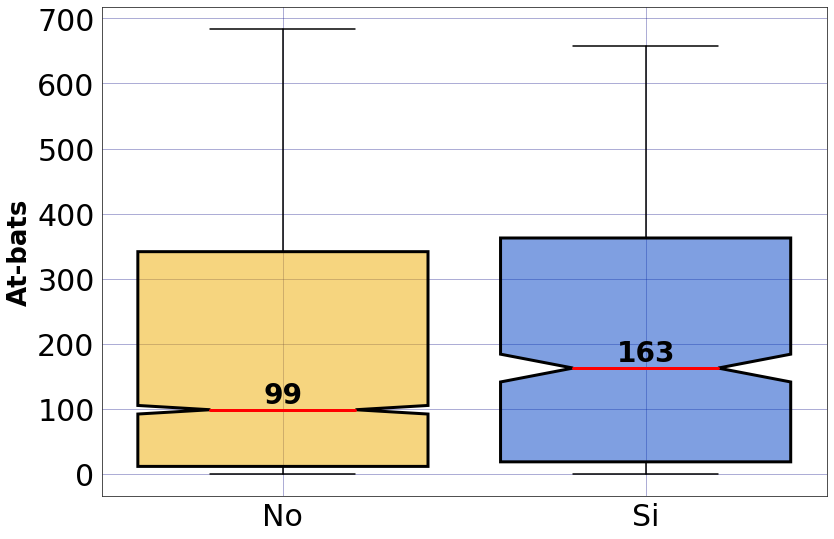

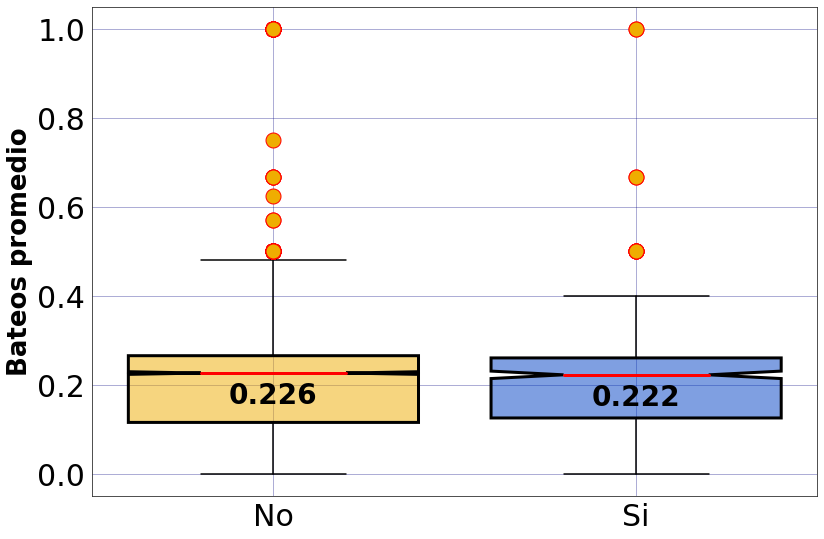

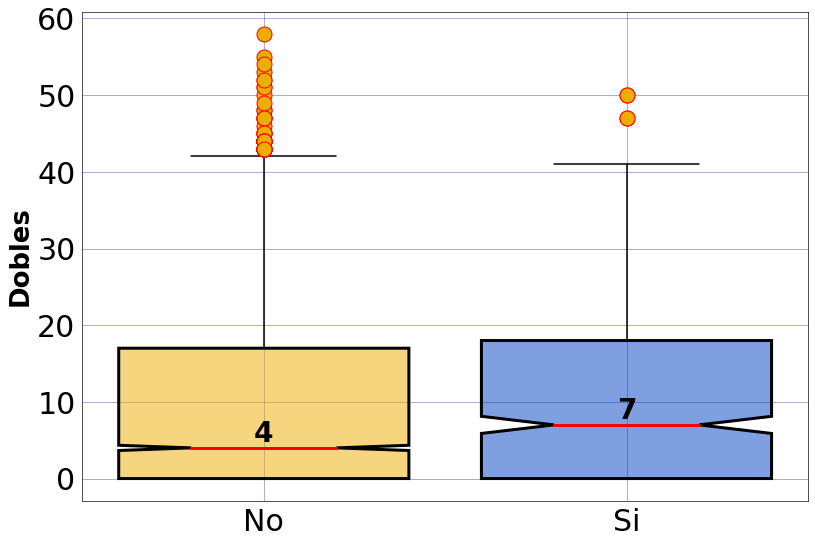

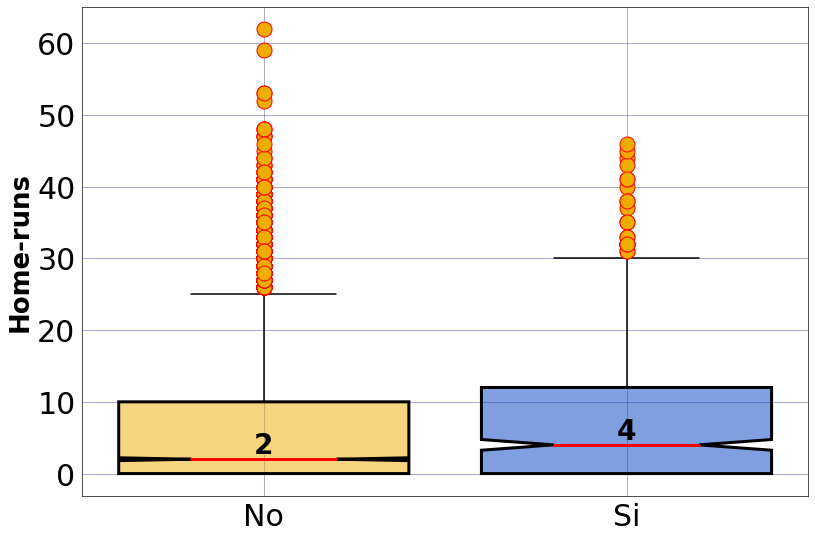

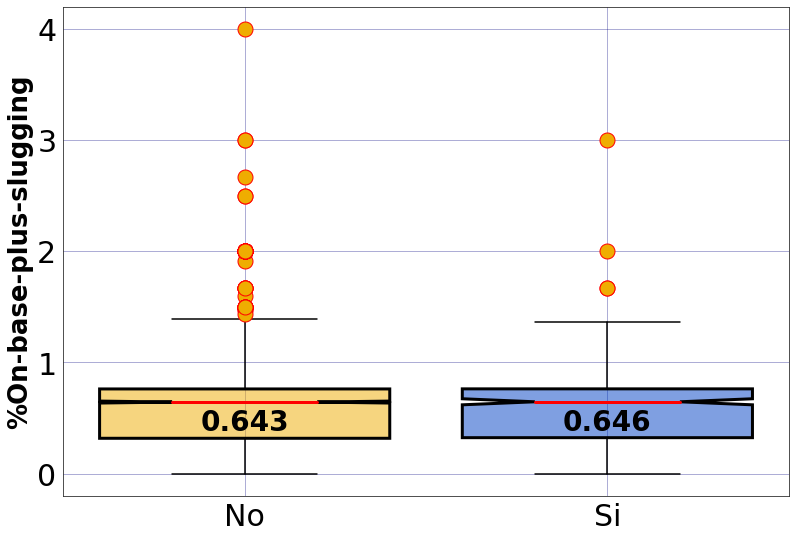

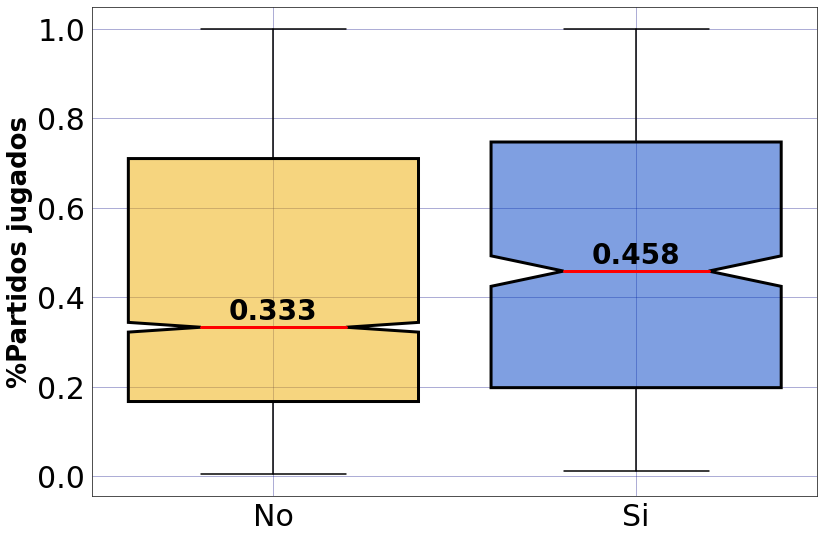

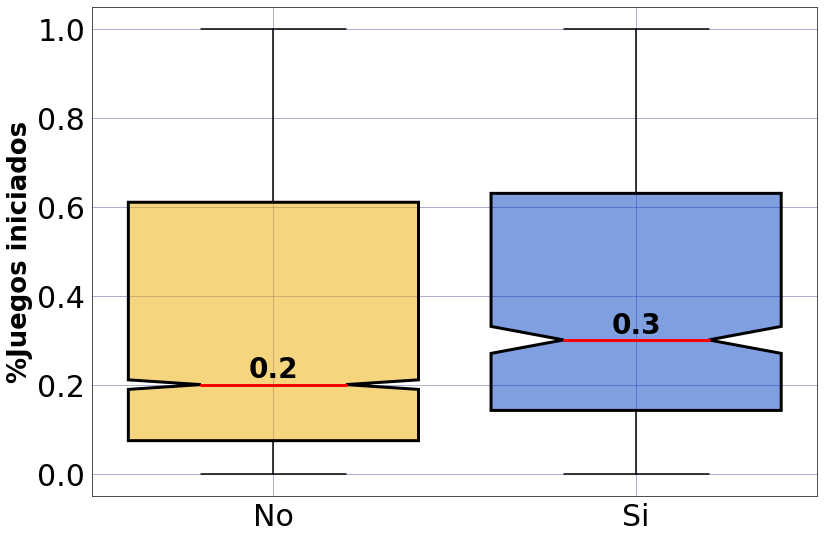

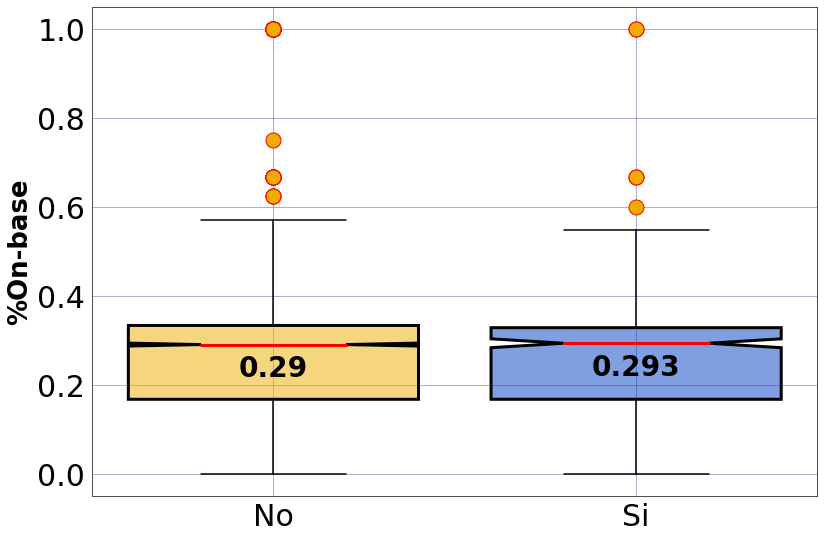

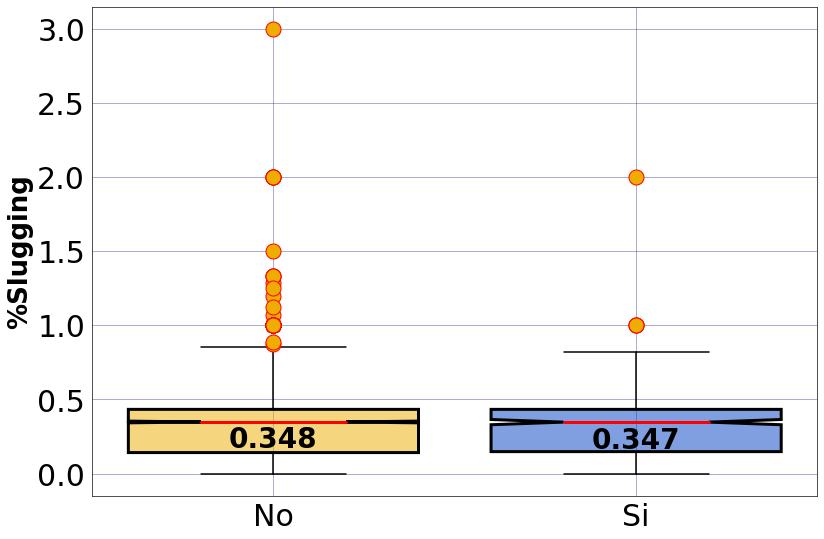

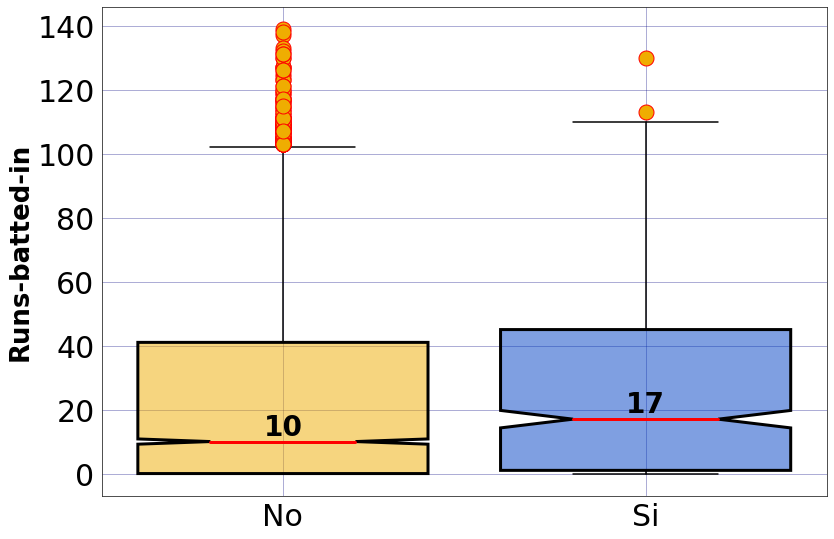

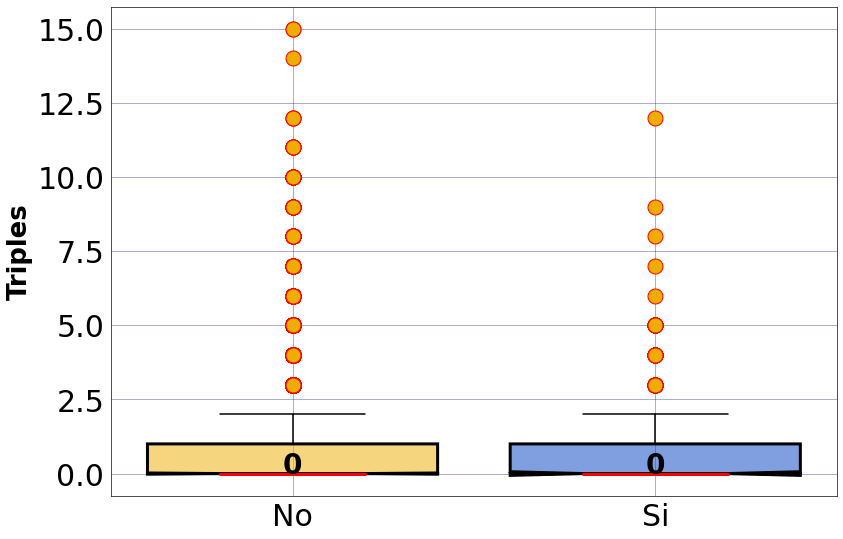

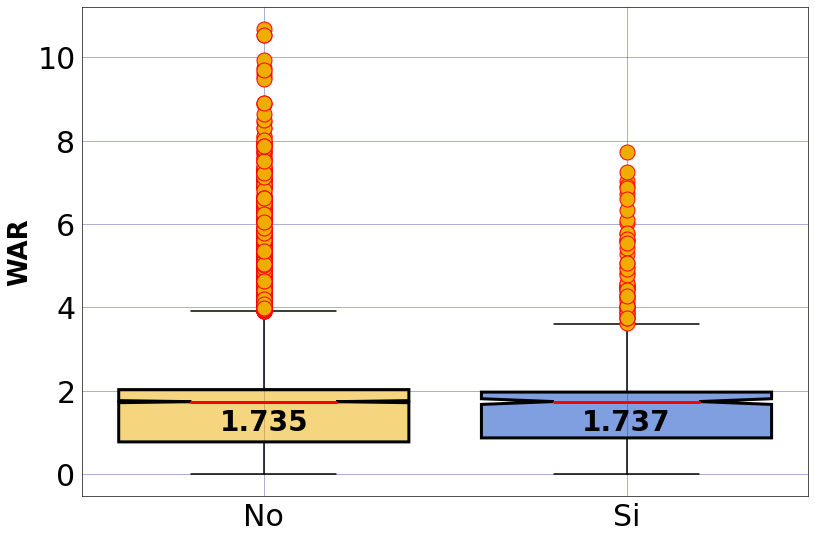

In [13]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))

    g_1 = sns.boxplot(x = 'Agente_libre',
                      y = hitter_statistics[i],
                      data = df_panel_hitter, 
                      notch = True, 
                      **kws_1)
    g_1.set_ylabel(hitter_labels[i],
                   fontsize = 26,
                   fontweight = 'bold',
                   color = 'black')
    g_1.set_xlabel('Agentes libres',
                   fontsize = 18,
                   fontweight = 'bold',
                   color = 'black')  
    g_1.tick_params(labelsize = 30,
                    labelcolor = 'black')
    g_1.set(xlabel = None)
    #g_1.set(ylabel = None)
    g_1.grid(color = 'navy',
             linestyle = '-',
             alpha = 0.4)

    mybox = g_1.artists[1]

    # Change the appearance of that box
    mybox.set_facecolor((0/255,64/255,196/255,0.5))

    medians = df_panel_hitter.groupby(['Agente_libre'])[hitter_statistics[i]].median()
    medians[0] = round(medians[0], 3)
    medians[1] = round(medians[1], 3)
    vertical_offset = df_panel_hitter[hitter_statistics[i]].median()

    for xtick in g_1.get_xticks():
        g_1.text(xtick,
                 medians[xtick] + vertical_offset*hitter_positions[i],
                 medians[xtick], 
                 horizontalalignment = 'center',
                 size = 28,
                 color = 'black',
                 weight = 'bold')
    g_1.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Boxplot/boxplot_hitter_" + str(hitter_labels[i]).lower() + ".pdf",
                format = "pdf")

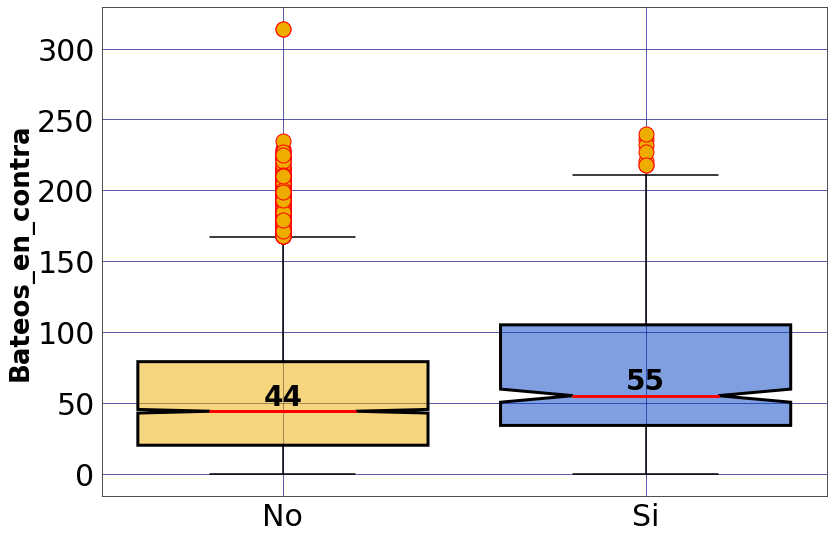

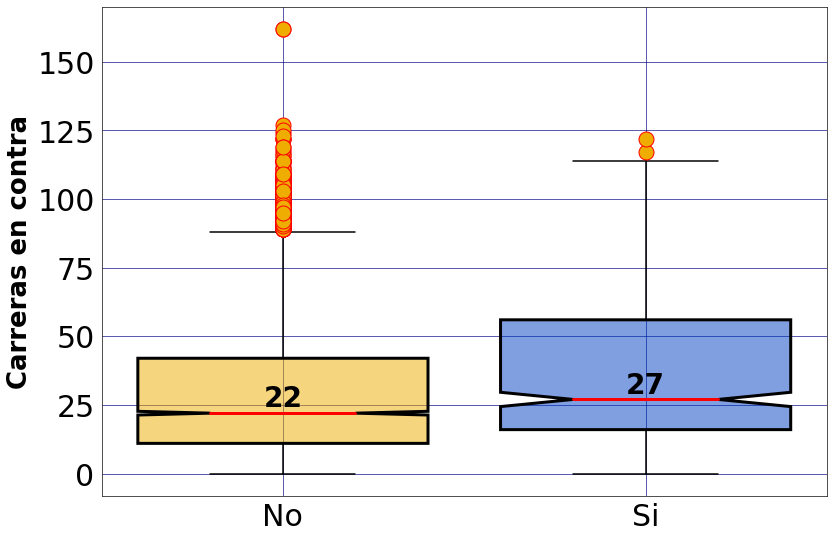

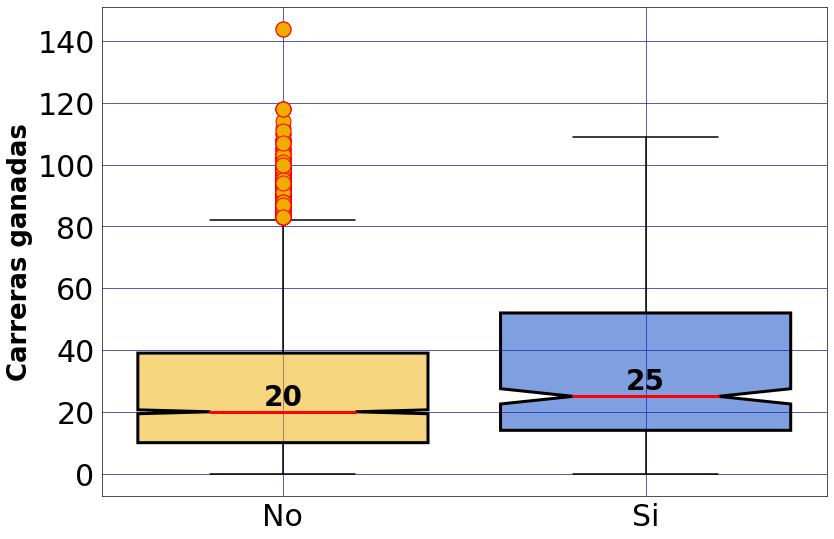

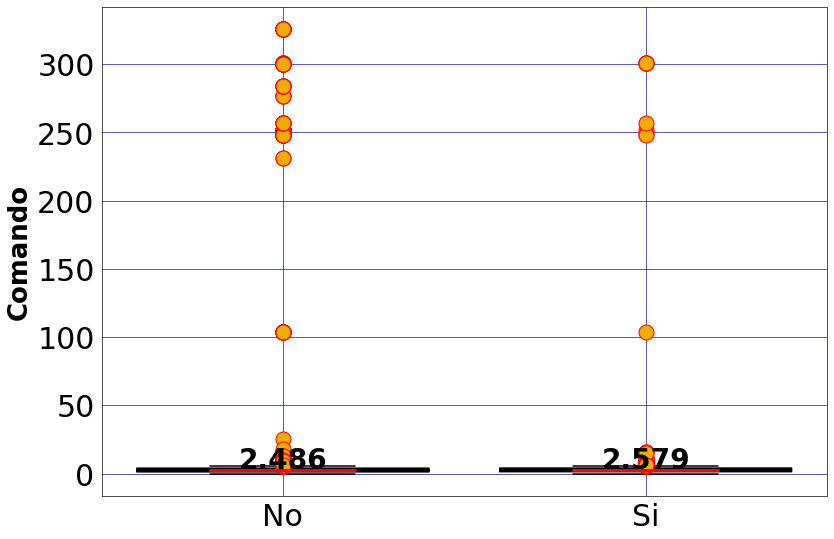

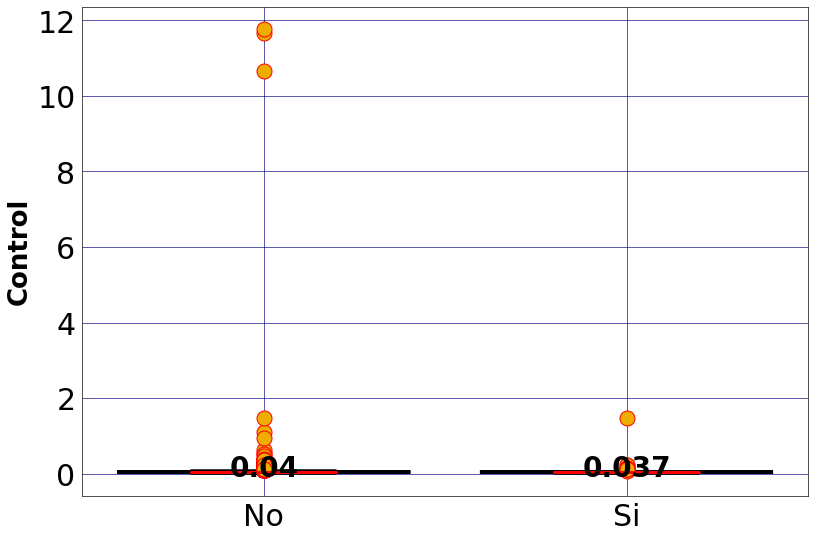

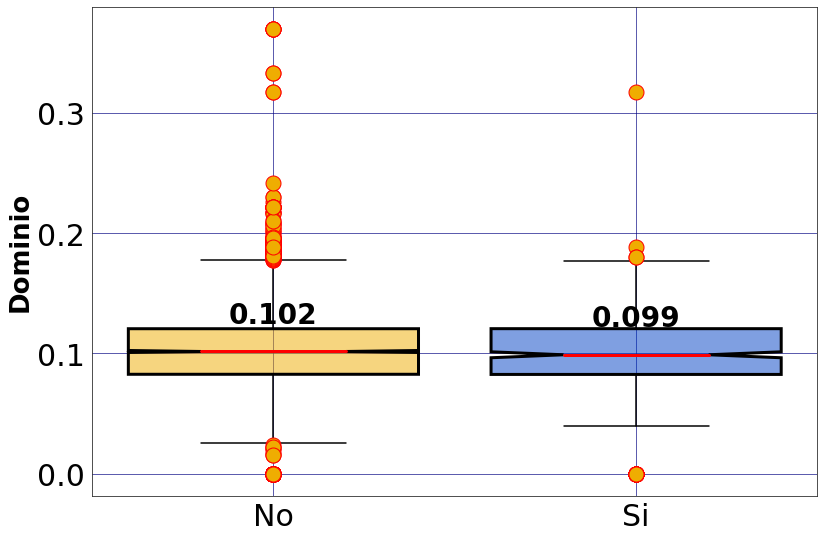

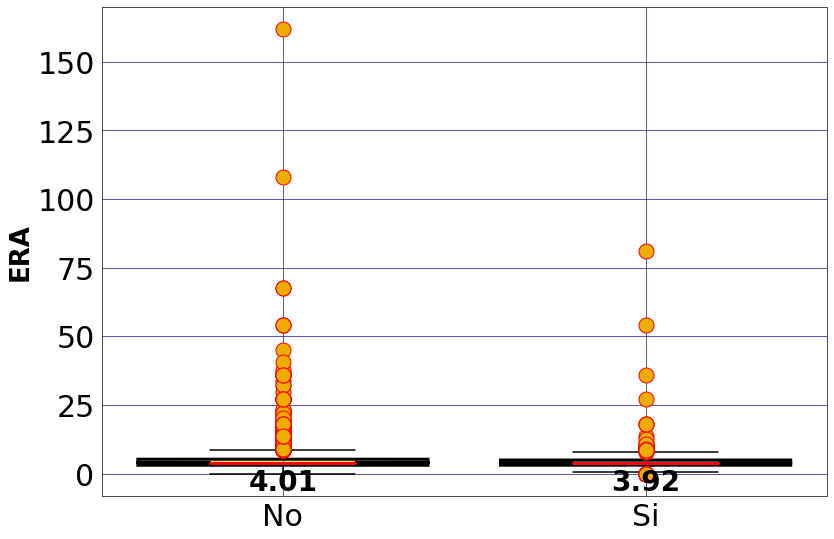

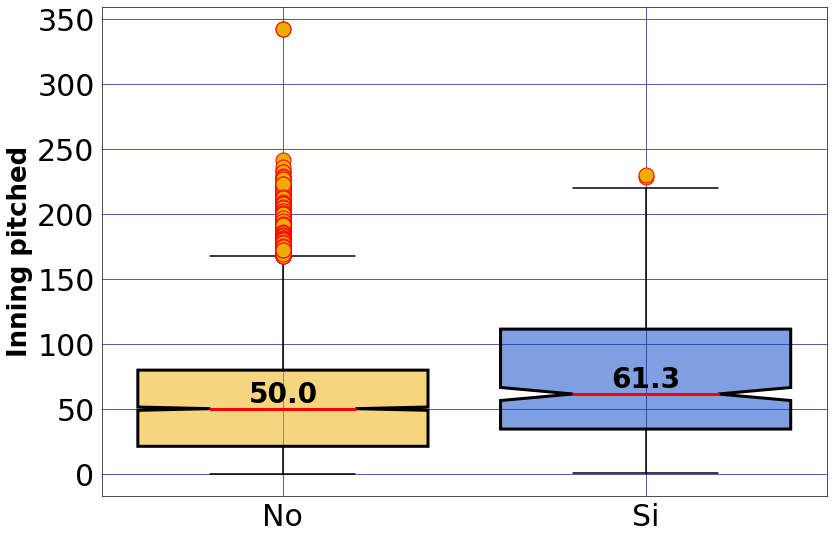

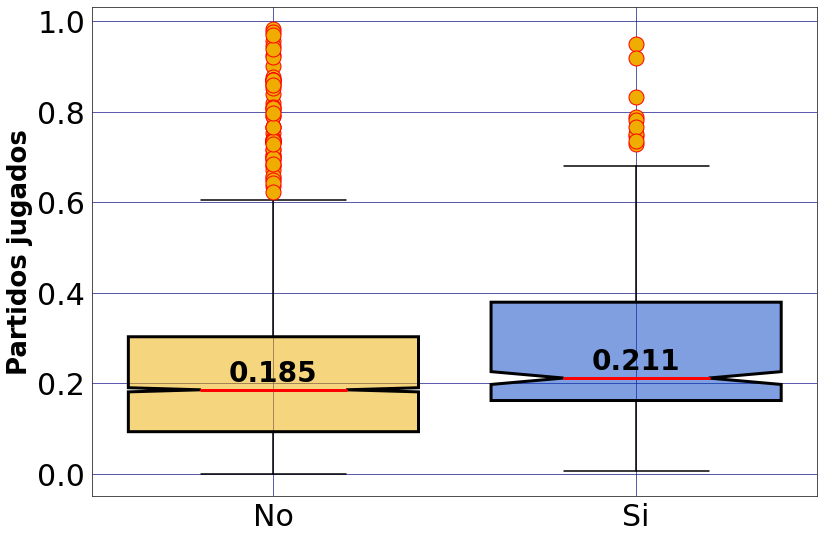

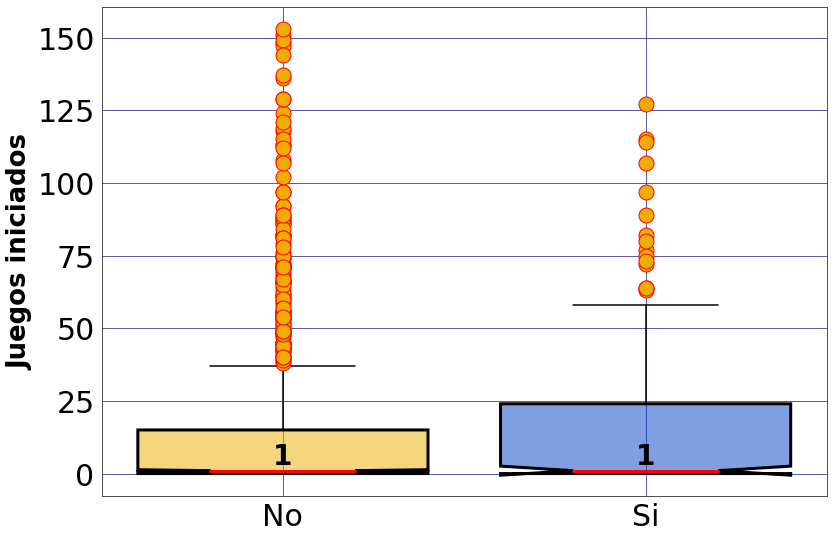

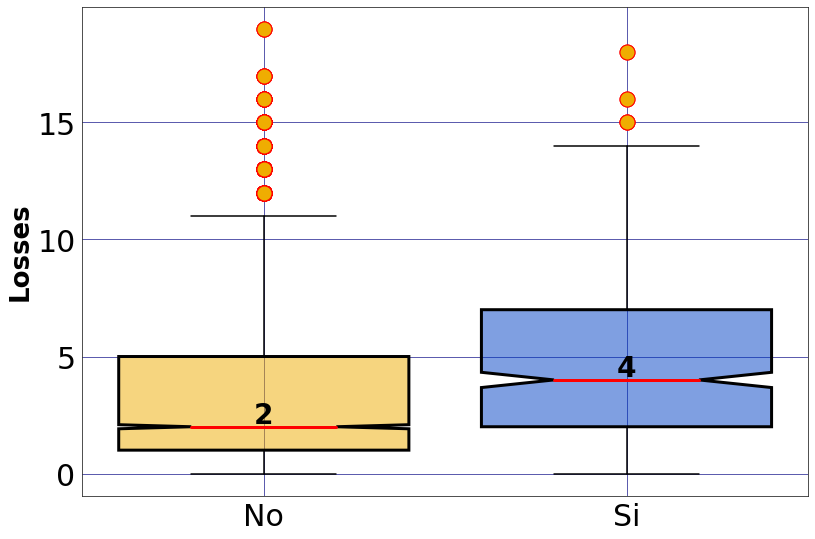

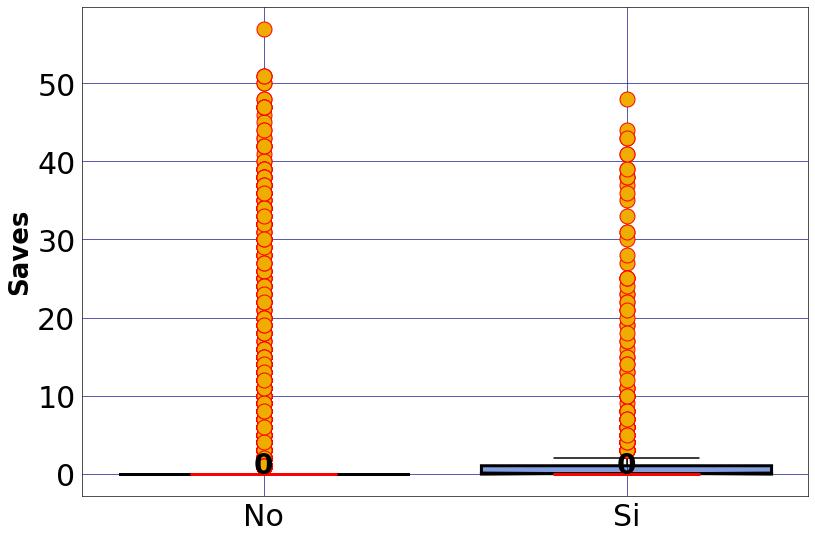

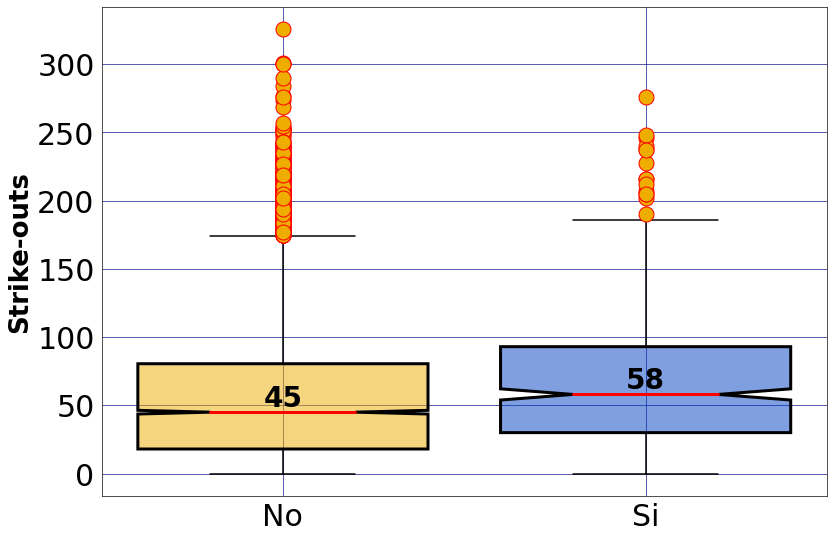

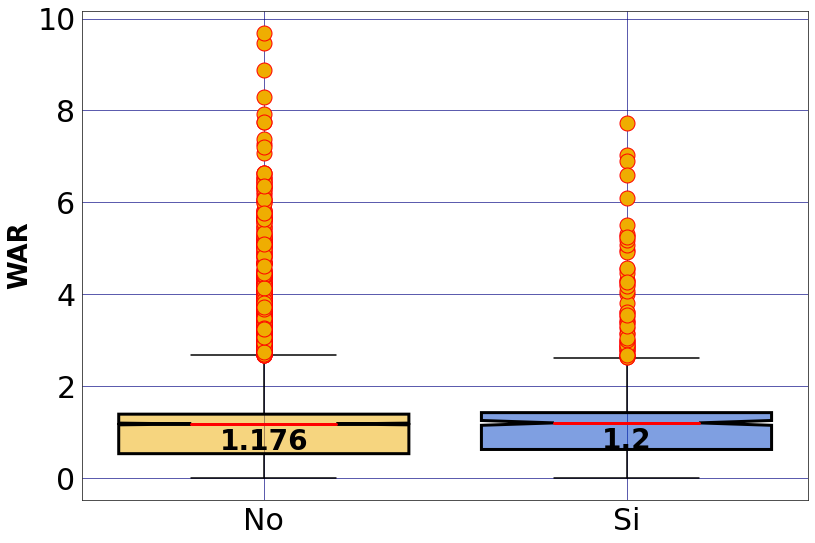

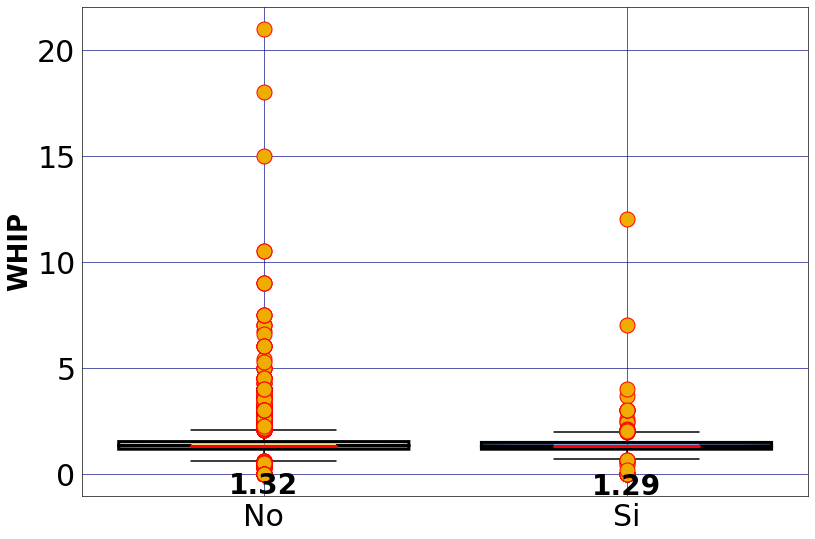

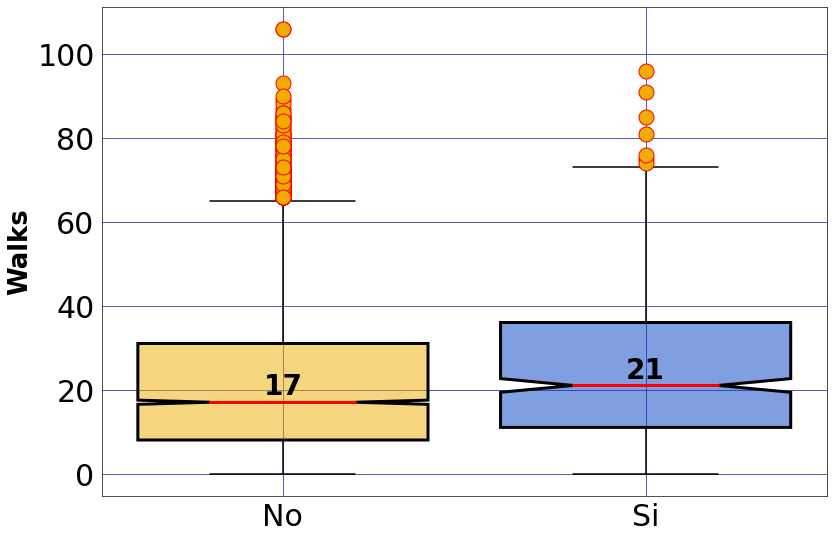

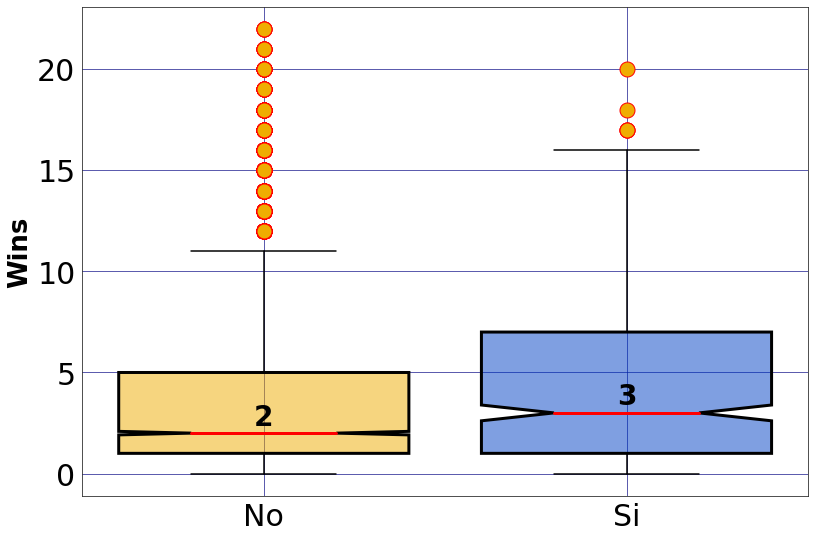

In [14]:
for i in range(0,len(pitcher_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))

    g_1 = sns.boxplot(x = 'Agente_libre',
                      y = pitcher_statistics[i],
                      data = df_panel_pitcher, 
                      notch = True, 
                      **kws_1)
    g_1.set_ylabel(pitcher_labels[i],
                   fontsize = 26,
                   fontweight = 'bold',
                   color = 'black')
    g_1.set_xlabel('Agentes libres',
                   fontsize = 19,
                   fontweight = 'bold',
                   color = 'black')  
    g_1.tick_params(labelsize = 30,
                    labelcolor = 'black')
    g_1.set(xlabel = None)
    #g_1.set(ylabel = None)
    g_1.grid(color = 'navy',
             linestyle = '-',
             alpha = 0.8)

    mybox = g_1.artists[1]

    # Change the appearance of that box
    mybox.set_facecolor((0/255,64/255,196/255,0.5))

    medians = df_panel_pitcher.groupby(['Agente_libre'])[pitcher_statistics[i]].median()
    medians[0] = round(medians[0], 3)
    medians[1] = round(medians[1], 3)
    vertical_offset = df_panel_pitcher[pitcher_statistics[i]].median()

    for xtick in g_1.get_xticks():
        g_1.text(xtick,
                 medians[xtick] + vertical_offset*pitcher_positions[i],
                 medians[xtick], 
                 horizontalalignment = 'center',
                 size = 28,
                 color = 'black',
                 weight = 'bold')
    g_1.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Boxplot/boxplot_pitcher_" + str(pitcher_labels[i]).lower() + ".pdf",
                format = "pdf")

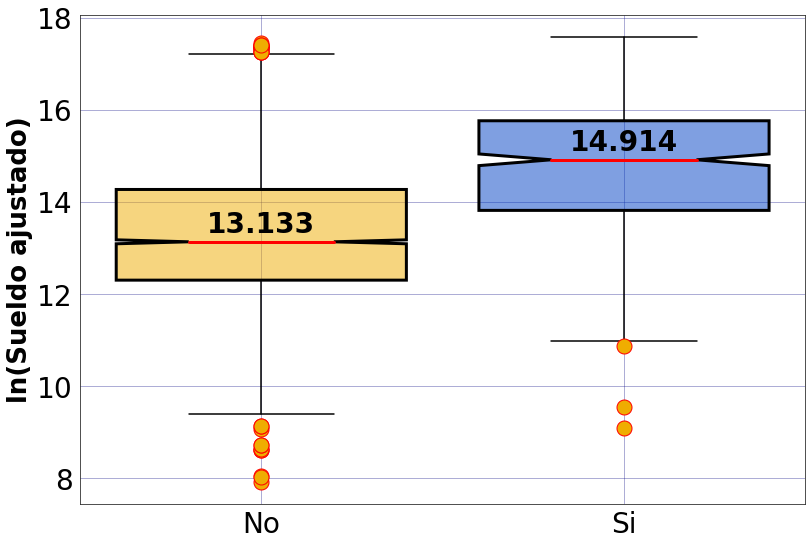

In [15]:
sns.set_style('white')
fig,axes = plt.subplots(figsize = (13,9))

g_1 = sns.boxplot(x = 'Agente_libre',
                  y = 'ln_Sueldo_ajustado',
                  data = df_panel_pitcher, 
                  notch = True, 
                  **kws_1)
g_1.set_ylabel('ln(Sueldo ajustado)',
               fontsize = 26,
               fontweight = 'bold',
               color = 'black')
g_1.set_xlabel('Agentes libres',
               fontsize = 19,
               fontweight = 'bold',
               color = 'black')
g_1.tick_params(labelsize = 28,
                labelcolor = 'black')
g_1.set(xlabel = None)
#g_1.set(ylabel = None)
g_1.grid(color = 'navy',
         linestyle = '-',
         alpha = 0.4)

# Cambiar color del segundo boxplot
mybox = g_1.artists[1]
mybox.set_facecolor((0/255,64/255,196/255,0.5))

medians = df_panel_pitcher.groupby(['Agente_libre'])['ln_Sueldo_ajustado'].median()
medians[0] = round(medians[0], 3)
medians[1] = round(medians[1], 3)
vertical_offset = df_panel_pitcher['ln_Sueldo_ajustado'].median()

for xtick in g_1.get_xticks():
    g_1.text(xtick,
             medians[xtick] + vertical_offset*0.015,
             medians[xtick], 
             horizontalalignment = 'center',
             size = 28,
             color = 'black',
             weight = 'bold')
g_1.patch.set_facecolor('white')

plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Boxplot/boxplot_hitter_ln_salario_ajustado.pdf",
            format = "pdf")

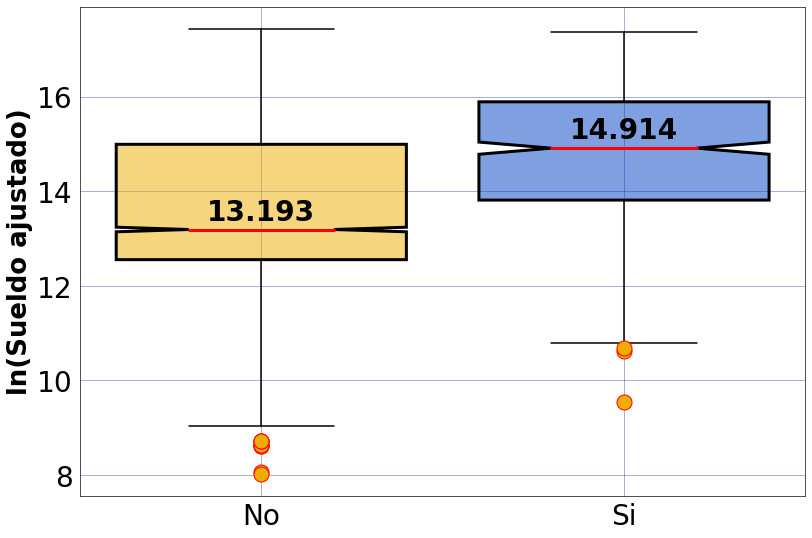

In [16]:
sns.set_style('white')
fig,axes = plt.subplots(figsize = (13,9))

g_1 = sns.boxplot(x = 'Agente_libre',
                  y = 'ln_Sueldo_ajustado',
                  data = df_panel_hitter, 
                  notch = True, 
                  **kws_1)
g_1.set_ylabel('ln(Sueldo ajustado)',
               fontsize = 26,
               fontweight = 'bold',
               color = 'black')
g_1.set_xlabel('Agentes libres',
               fontsize = 19,
               fontweight = 'bold',
               color = 'black')  
g_1.tick_params(labelsize = 28,
                labelcolor = 'black')
g_1.set(xlabel = None)
#g_1.set(ylabel = None)
g_1.grid(color = 'navy',
         linestyle = '-',
         alpha = 0.4)

# Cambiar color del segundo boxplot
mybox = g_1.artists[1]
mybox.set_facecolor((0/255,64/255,196/255,0.5))

medians = df_panel_hitter.groupby(['Agente_libre'])['ln_Sueldo_ajustado'].median()
medians[0] = round(medians[0], 3)
medians[1] = round(medians[1], 3)
vertical_offset = df_panel_hitter['ln_Sueldo_ajustado'].median()

for xtick in g_1.get_xticks():
    g_1.text(xtick,
             medians[xtick] + vertical_offset*0.015,
             medians[xtick], 
             horizontalalignment = 'center',
             size = 28,
             color = 'black',
             weight = 'bold')
g_1.patch.set_facecolor('white')
plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Boxplot/boxplot_pitcher_ln_salario_ajustado.pdf",
            format = "pdf")

### Datos generales

In [17]:
general_data = ['Altura',
                'Anios_de_contrato',
                'Antiguedad',
                'Bono_por_firma',
                'Edad',
                'Peso']
labels_gen = ['Altura',
              'Anios de contrato',
              'Antiguedad',
              'Bono por firma',
              'Edad',
              'Peso']

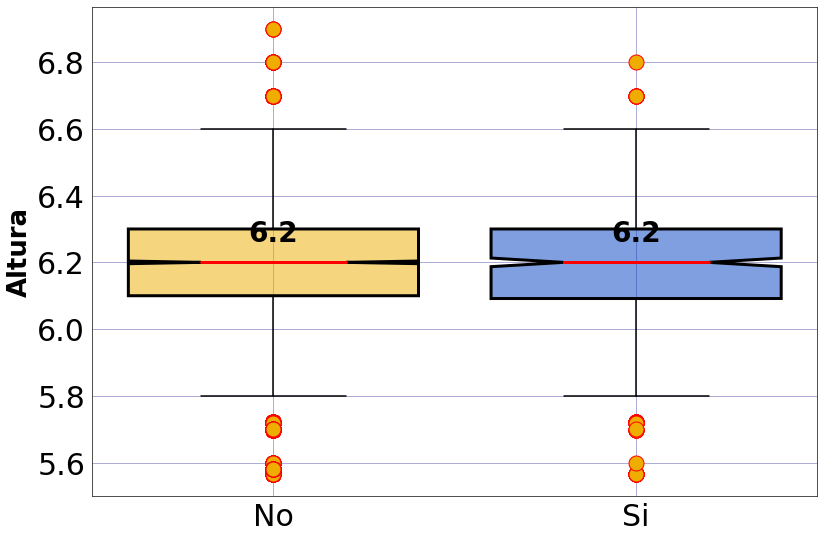

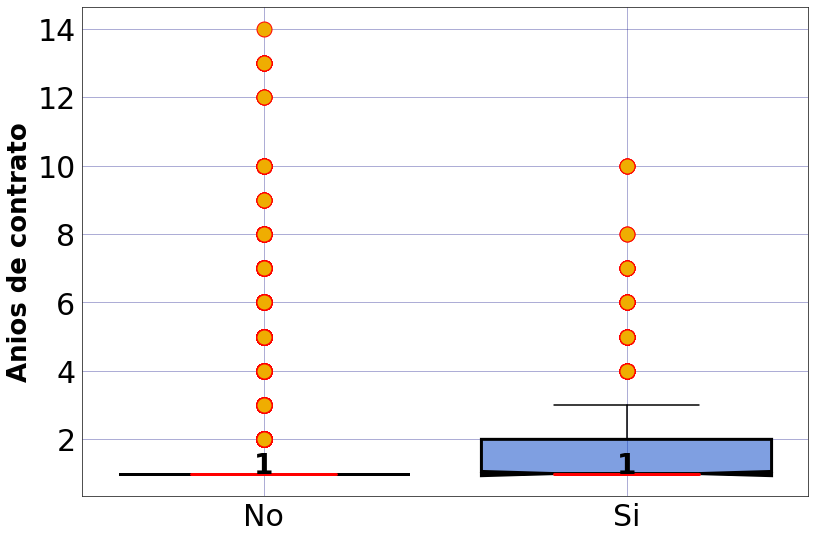

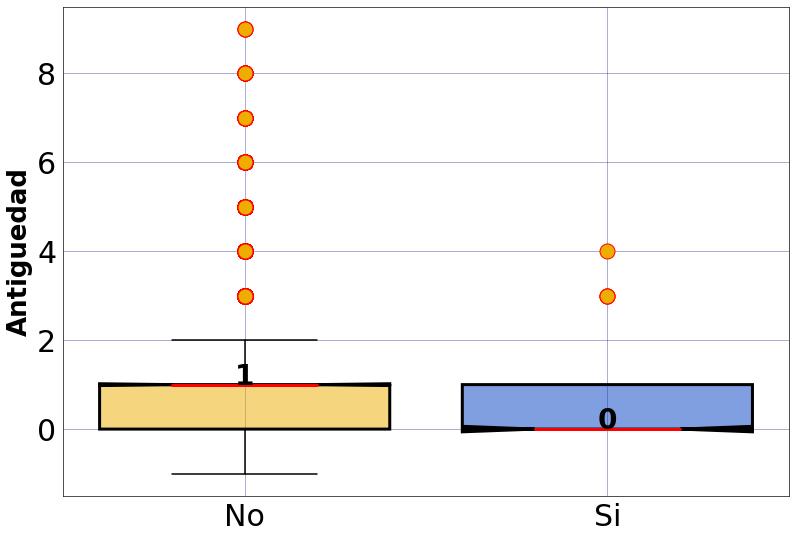

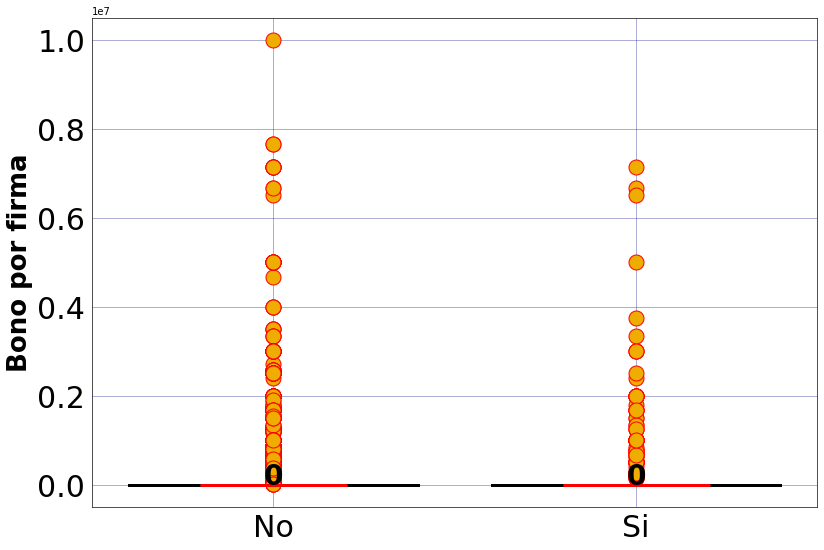

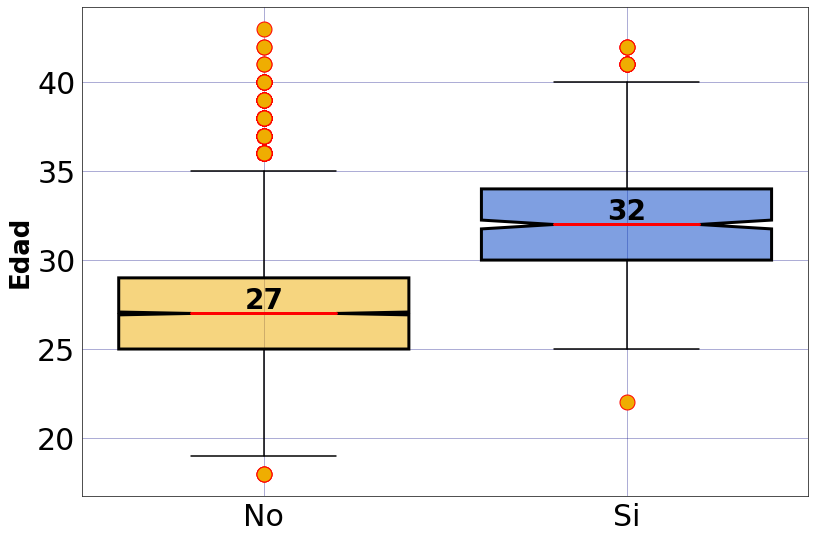

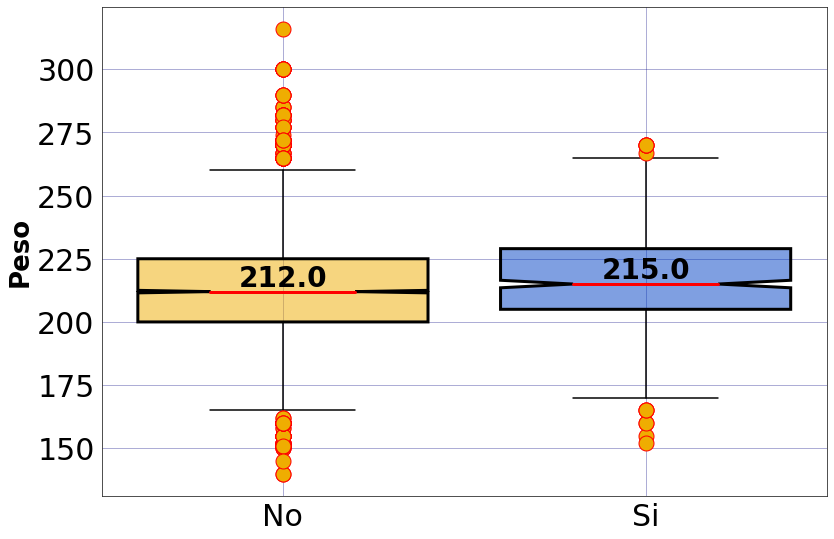

In [18]:
for i in range(0,len(general_data)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))

    g_2 = sns.boxplot(x = 'Agente_libre',
                      y = general_data[i],
                      data = df_panel_hitter, 
                      notch = True, 
                      **kws_1)
    g_2.set_ylabel(labels_gen[i],
                   fontsize = 26,
                   fontweight = 'bold',
                   color = 'black')
    g_2.set_xlabel('Agentes libres',
                   fontsize = 18,
                   fontweight = 'bold',
                   color = 'black')  
    g_2.tick_params(labelsize = 30,
                    labelcolor = 'black')
    g_2.set(xlabel = None)
    #g_1.set(ylabel = None)
    g_2.grid(color = 'navy',
             linestyle = '-',
             alpha = 0.4)

    mybox = g_2.artists[1]

    # Change the appearance of that box
    mybox.set_facecolor((0/255,64/255,196/255,0.5))

    medians = df_panel_hitter.groupby(['Agente_libre'])[general_data[i]].median()
    medians[0] = round(medians[0], 3)
    medians[1] = round(medians[1], 3)
    vertical_offset = df_panel_hitter[general_data[i]].median()

    for xtick in g_2.get_xticks():
        g_2.text(xtick,
                 medians[xtick] + vertical_offset*0.01,
                 medians[xtick], 
                 horizontalalignment = 'center',
                 size = 28,
                 color = 'black',
                 weight = 'bold')
    g_1.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Boxplot/boxplot_hitter_" + str(labels_gen[i]).lower() + ".pdf",
                format = "pdf")

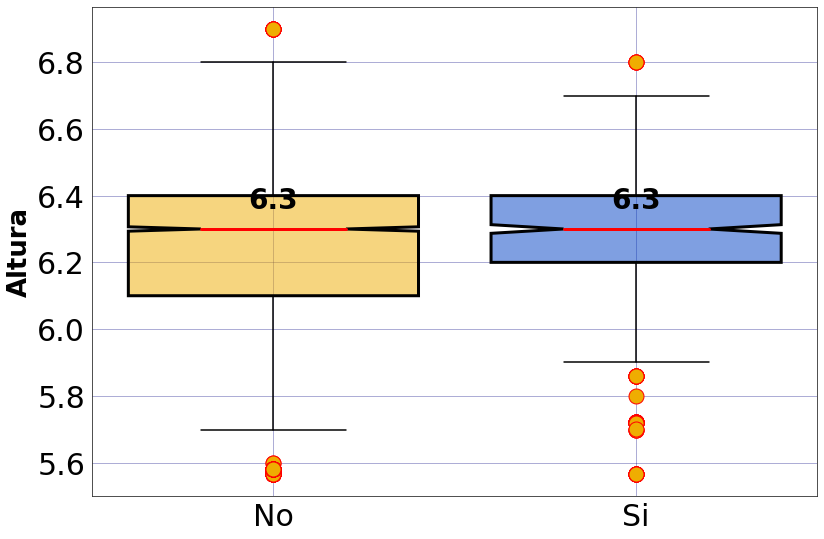

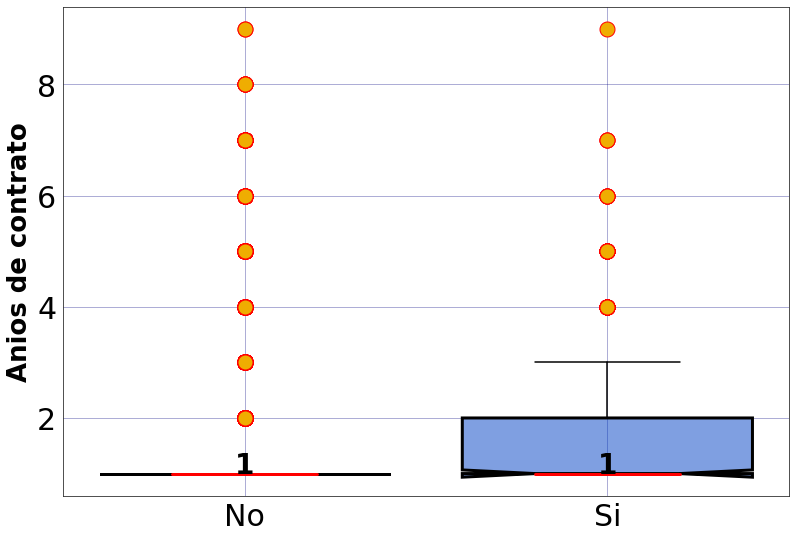

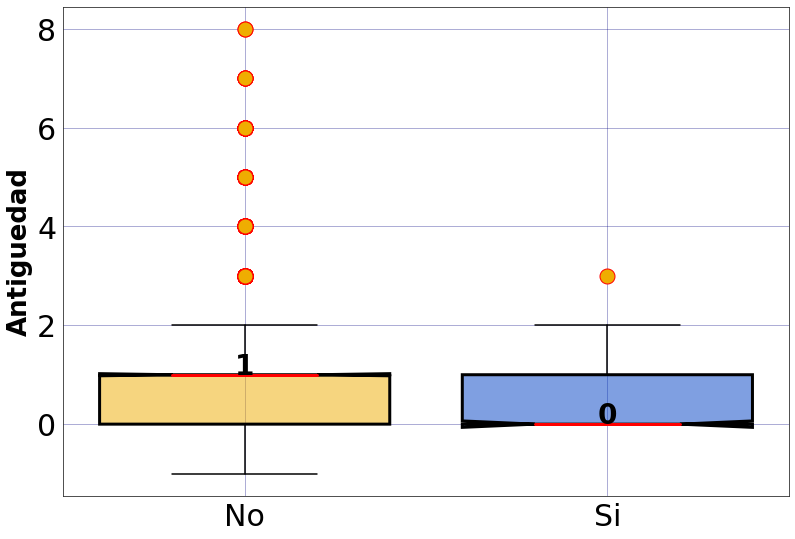

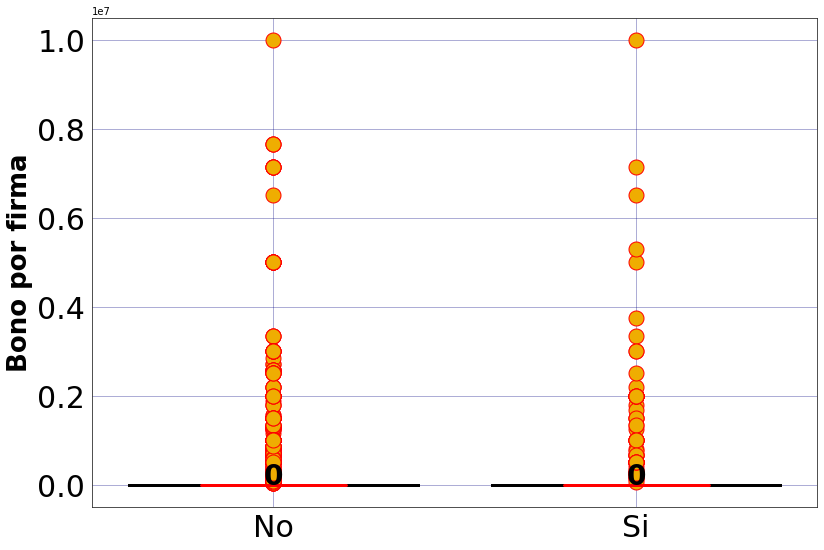

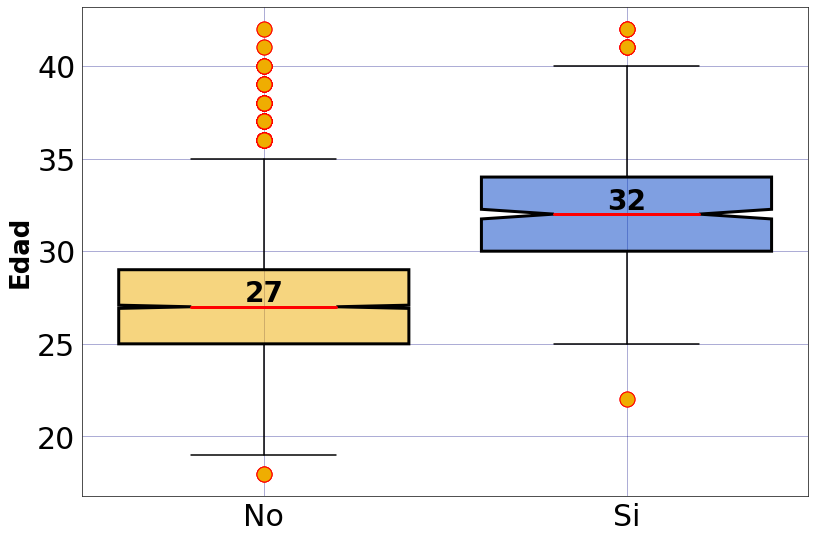

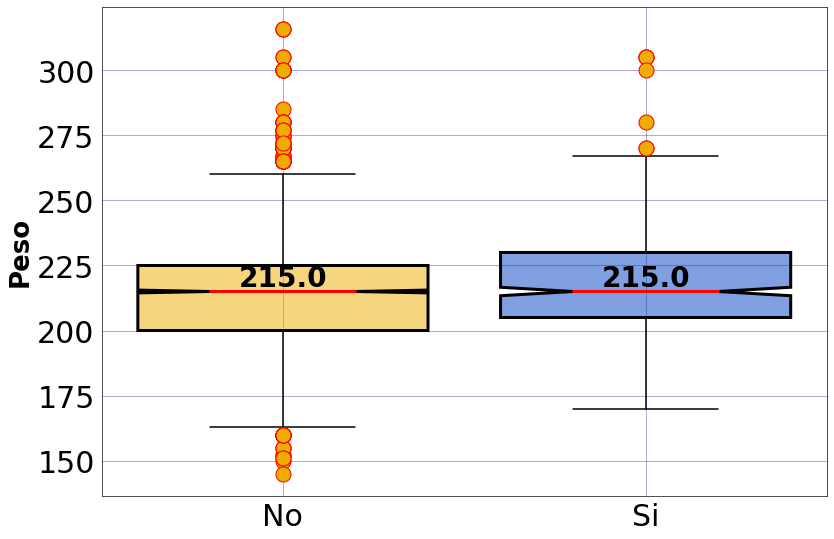

In [19]:
for i in range(0,len(general_data)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))

    g_2 = sns.boxplot(x = 'Agente_libre',
                      y = general_data[i],
                      data = df_panel_pitcher, 
                      notch = True, 
                      **kws_1)
    g_2.set_ylabel(labels_gen[i],
                   fontsize = 26,
                   fontweight = 'bold',
                   color = 'black')
    g_2.set_xlabel('Agentes libres',
                   fontsize = 18,
                   fontweight = 'bold',
                   color = 'black')  
    g_2.tick_params(labelsize = 30,
                    labelcolor = 'black')
    g_2.set(xlabel = None)
    #g_1.set(ylabel = None)
    g_2.grid(color = 'navy',
             linestyle = '-',
             alpha = 0.4)

    mybox = g_2.artists[1]

    # Change the appearance of that box
    mybox.set_facecolor((0/255,64/255,196/255,0.5))

    medians = df_panel_pitcher.groupby(['Agente_libre'])[general_data[i]].median()
    medians[0] = round(medians[0], 3)
    medians[1] = round(medians[1], 3)
    vertical_offset = df_panel_pitcher[general_data[i]].median()

    for xtick in g_2.get_xticks():
        g_2.text(xtick,
                 medians[xtick] + vertical_offset*0.01,
                 medians[xtick], 
                 horizontalalignment = 'center',
                 size = 28,
                 color = 'black',
                 weight = 'bold')
    g_1.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Boxplot/boxplot_pitcher_" + str(labels_gen[i]).lower() + ".pdf",
                format = "pdf")

## Series de tiempo

Grafiquemos los promedios a lo largo de las temporadas

In [20]:
temporadas = [str(year) for year in range(2012,2023)]

In [21]:
mean_panel_hitter = df_panel_hitter.groupby(['Agente_libre','Anio']).mean()
mean_panel_hitter.reset_index(inplace = True)
mean_panel_pitcher = df_panel_pitcher.groupby(['Agente_libre','Anio']).mean()
mean_panel_pitcher.reset_index(inplace = True)

In [22]:
mean_panel_hitter[mean_panel_hitter['Anio'] >= 2018].head()

Agente_libre  Anio    Altura  Anio_de_agente_libre  Anios_de_contrato  \
7            No  2018  6.190659            786.316279           1.781395   
8            No  2019  6.198944           1372.922272           1.762332   
9            No  2020  6.158358           1728.146179           2.056478   
10           No  2021  6.212690           1665.064298           1.810491   
11           No  2022  6.103242           1645.309392           1.895028   

    Antiguedad     At-bats      At-bats_2     Bateos     Bateos_2  ...  \
7     0.998450  179.426357   72834.204651  44.753488  4960.883721  ...   
8     0.911809  172.137519   68465.886398  43.671151  4872.550075  ...   
9     1.056478  120.275748   19027.199336  30.132890  1275.408638  ...   
10    0.922166  179.918782   71240.263959  44.928934  4861.774958  ...   
11    0.930939  310.204420  128112.574586  76.616022  8311.162983  ...   

    Valor_contrato_promedio  Valor_contrato_total  Valor_del_contrato  \
7              3.522462e+06          5.131274e+07        1.516893e+07   
8              3.631214e+06          6.572715e+07        1.495446e+07   
9              4.588706e+06          7.336643e+07        2.088488e+07   
10             4.150623e+06          4.613869e+07        1.813553e+07   
11             4.580556e+06          1.079439e+08        2.015762e+07   

    Victorias       WAR     WAR_2  WS ganadas  ln_Sueldo_ajustado  \
7   81.252713  1.713148  5.114242    3.863566           13.633565   
8   79.886398  1.817142  5.403454    4.011958           13.599922   
9   29.199336  0.876093  1.180159    4.205980           13.052910   
10  80.502538  1.773556  5.151297    4.052453           13.797103   
11  80.707182  1.910898  6.063241    3.825967           14.051059   

    ln_Sueldo_base  ln_Sueldo_regular  
7        14.084228          14.098622  
8        14.079548          14.096119  
9        14.261085          14.276202  
10       14.247175          14.259127  
11       14.461703          14.474136  

[5 rows x 60 columns]

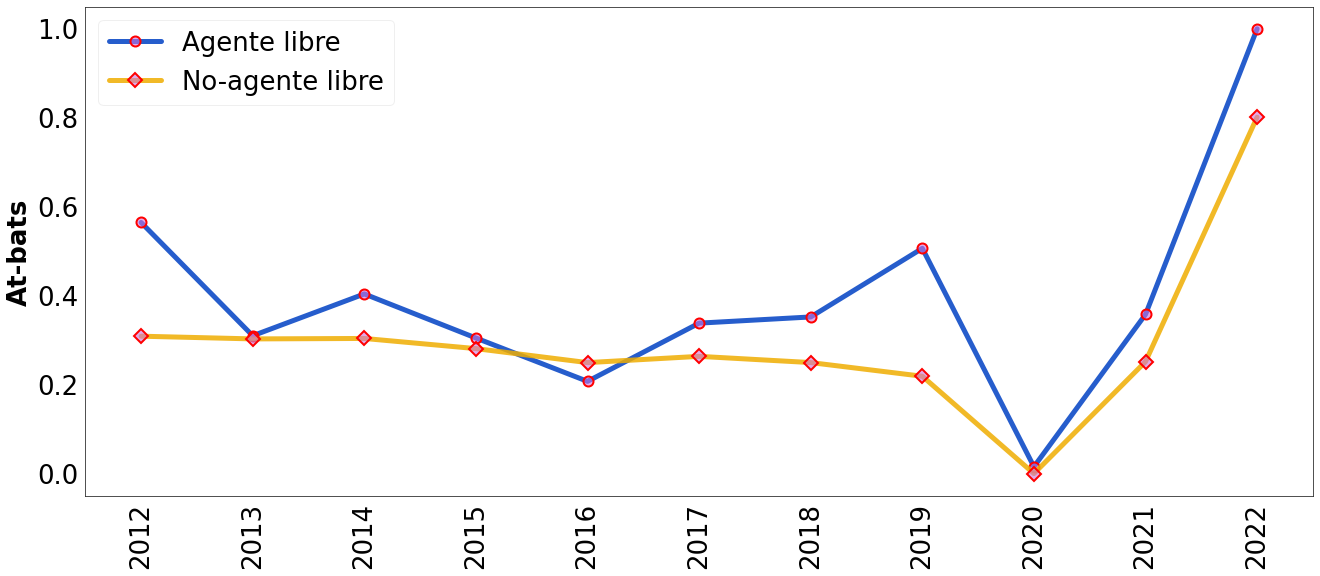

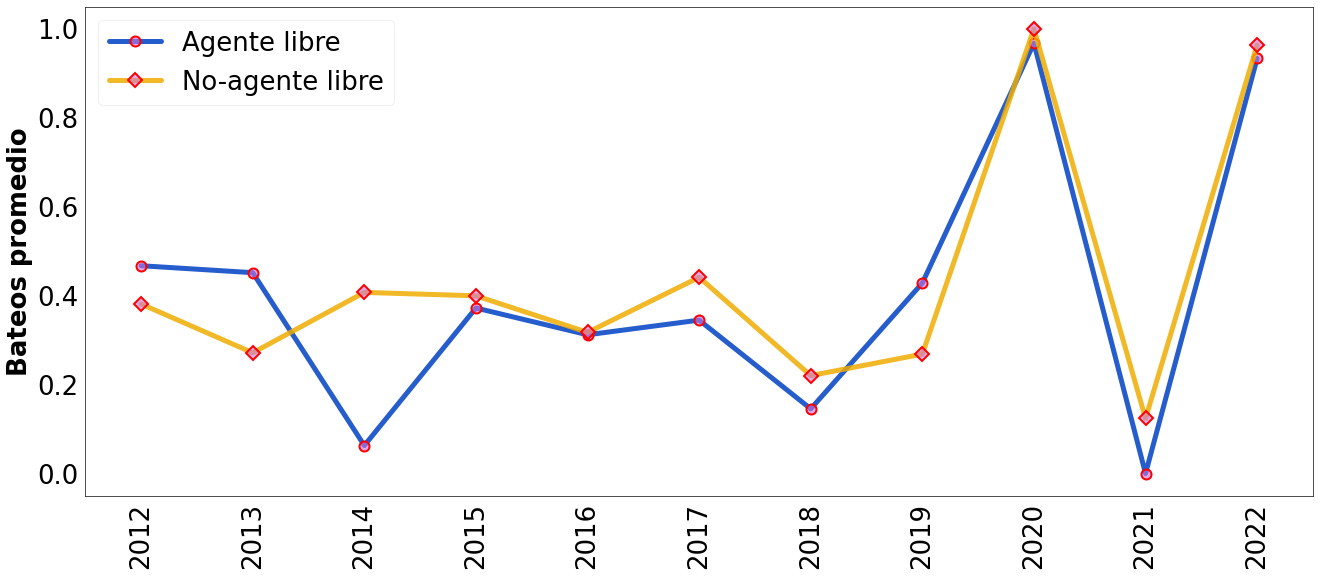

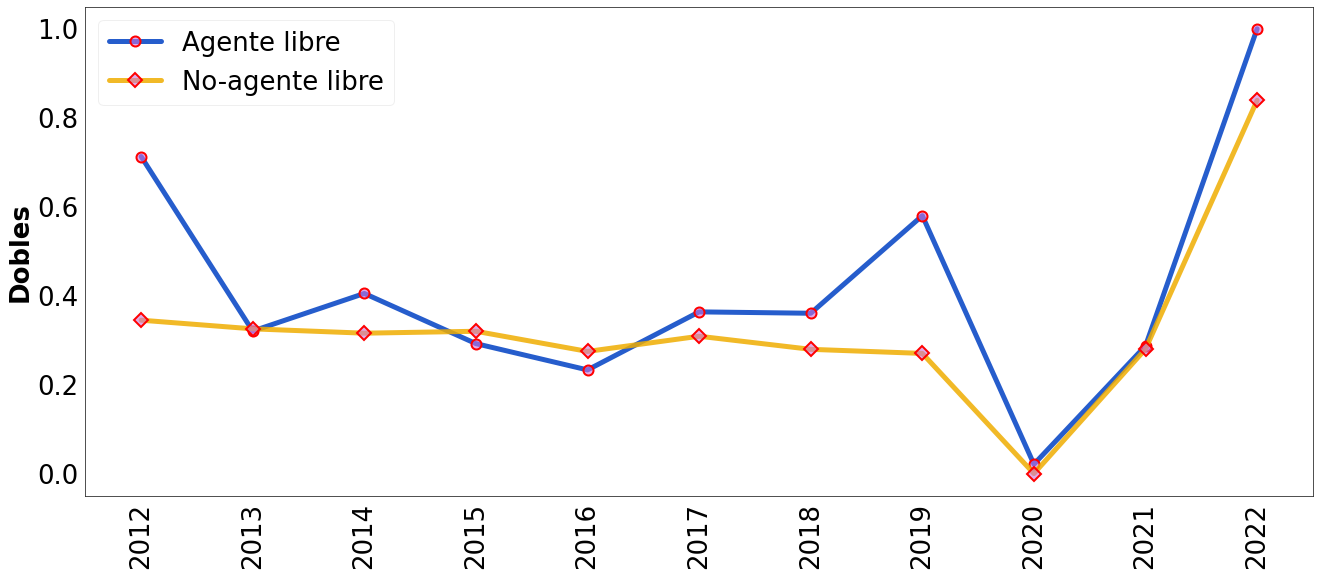

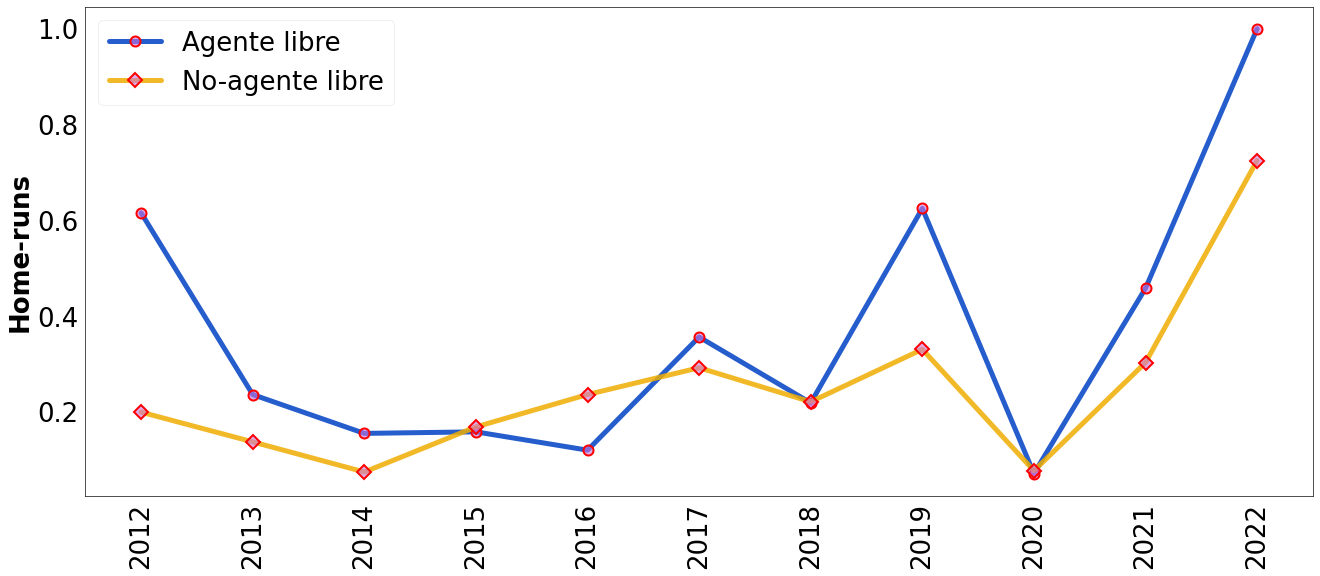

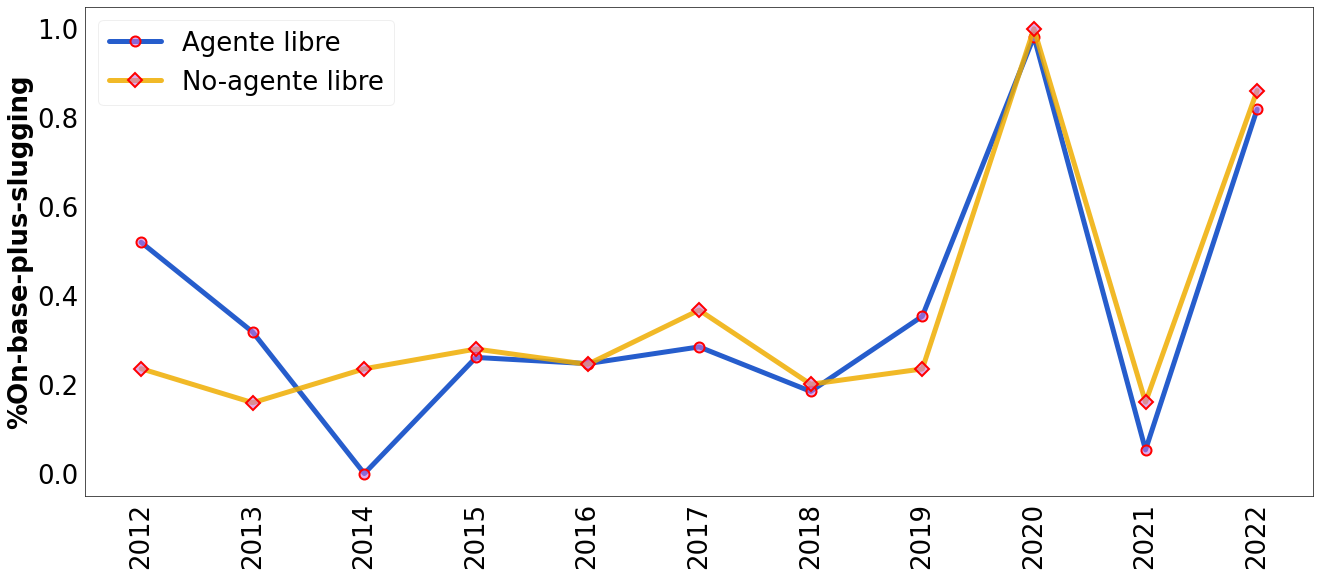

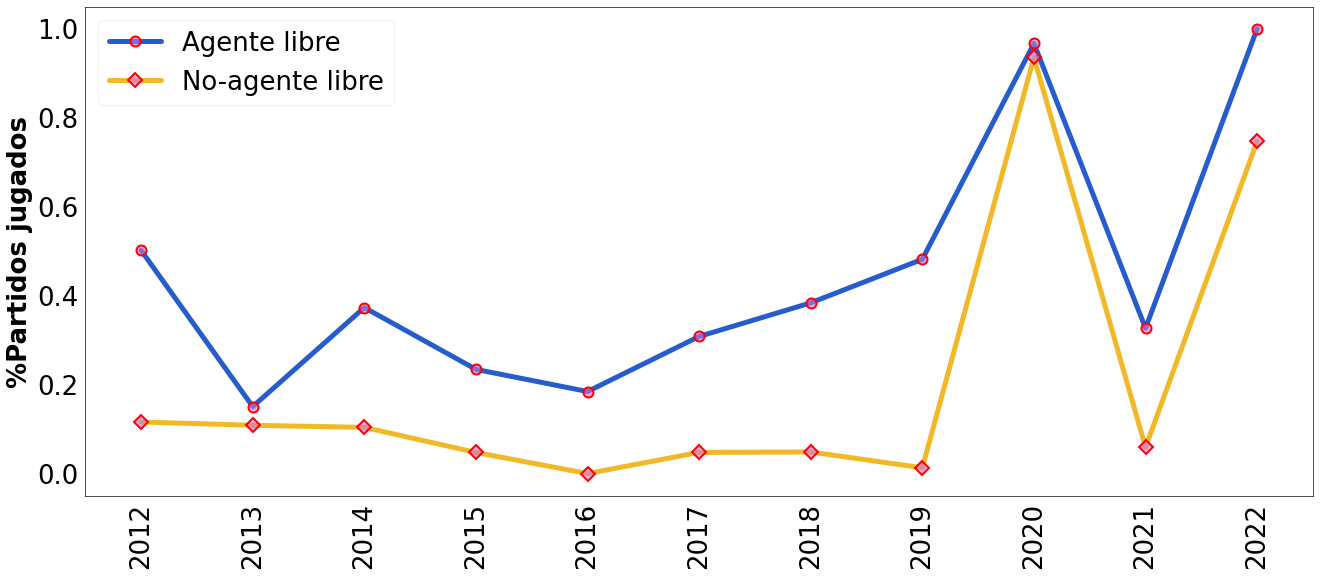

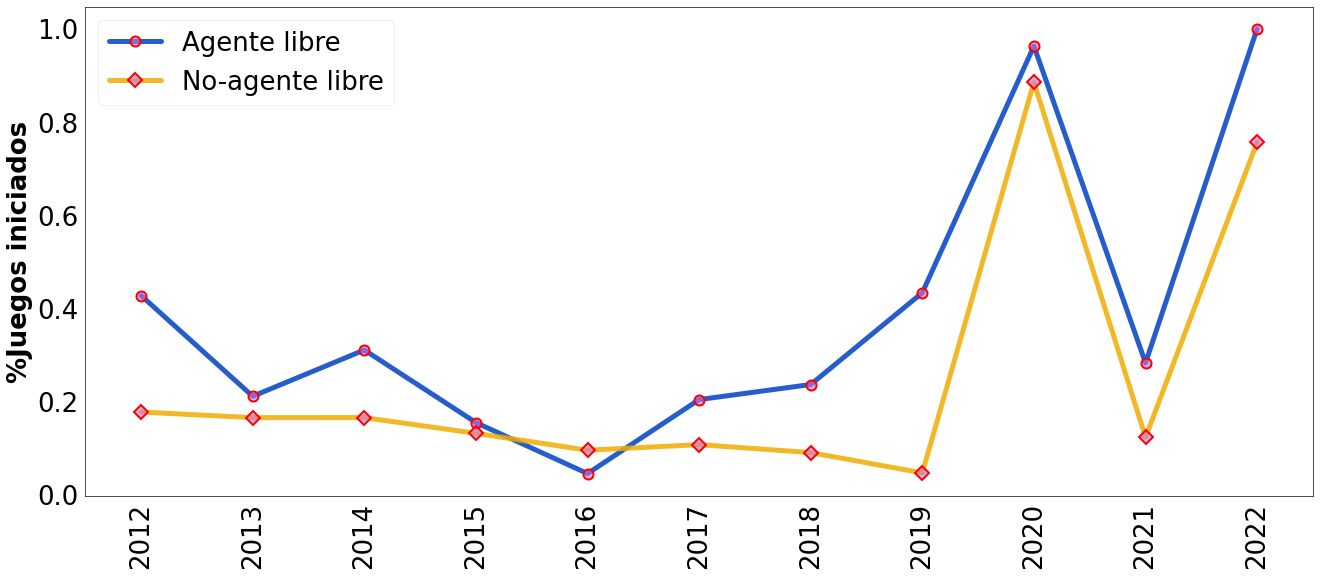

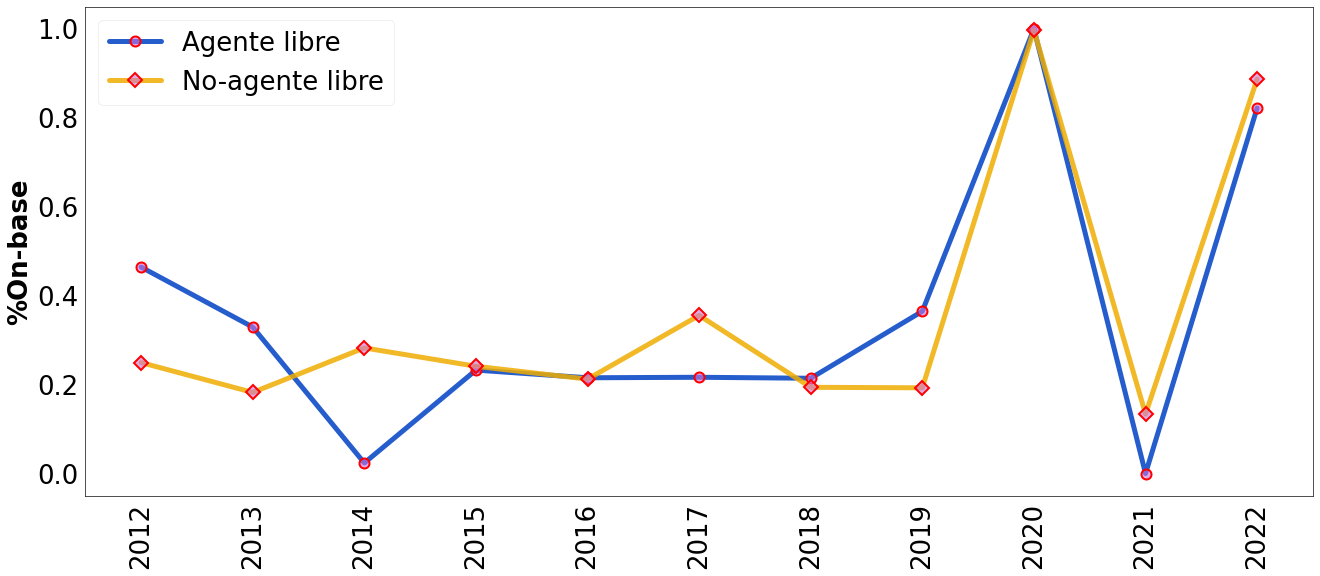

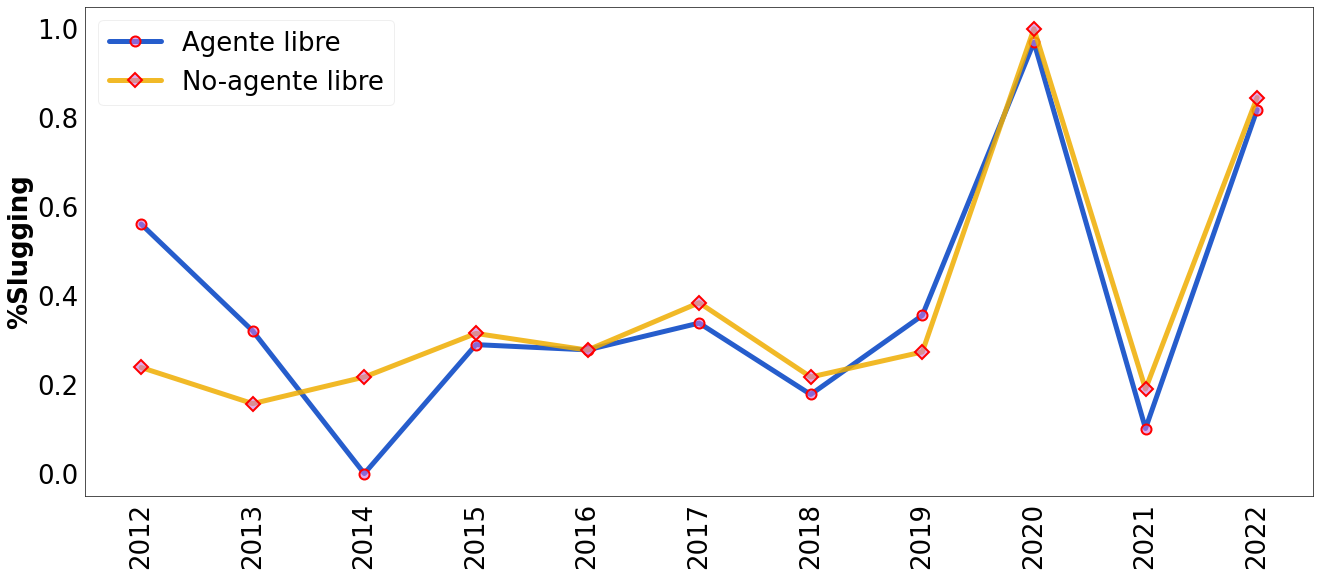

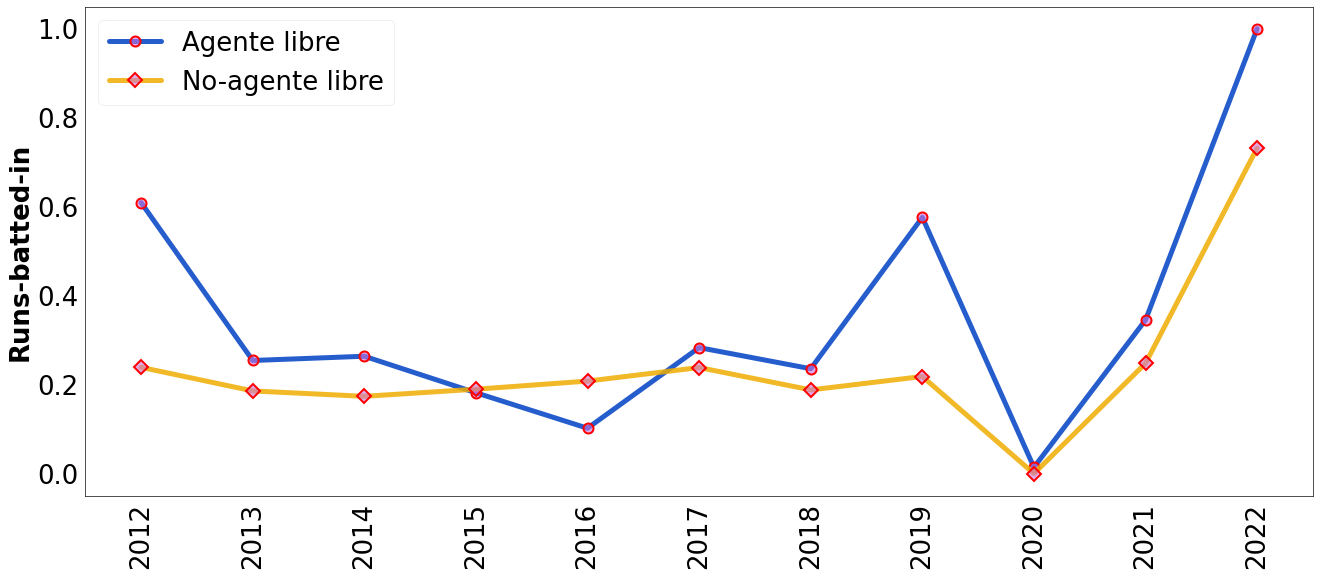

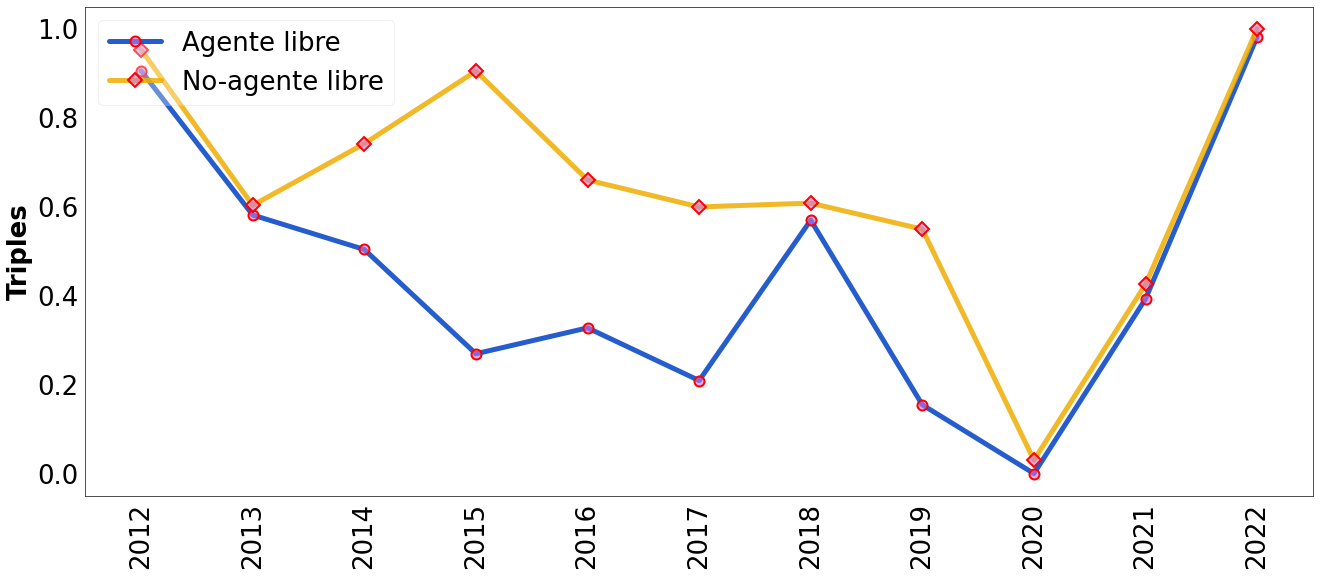

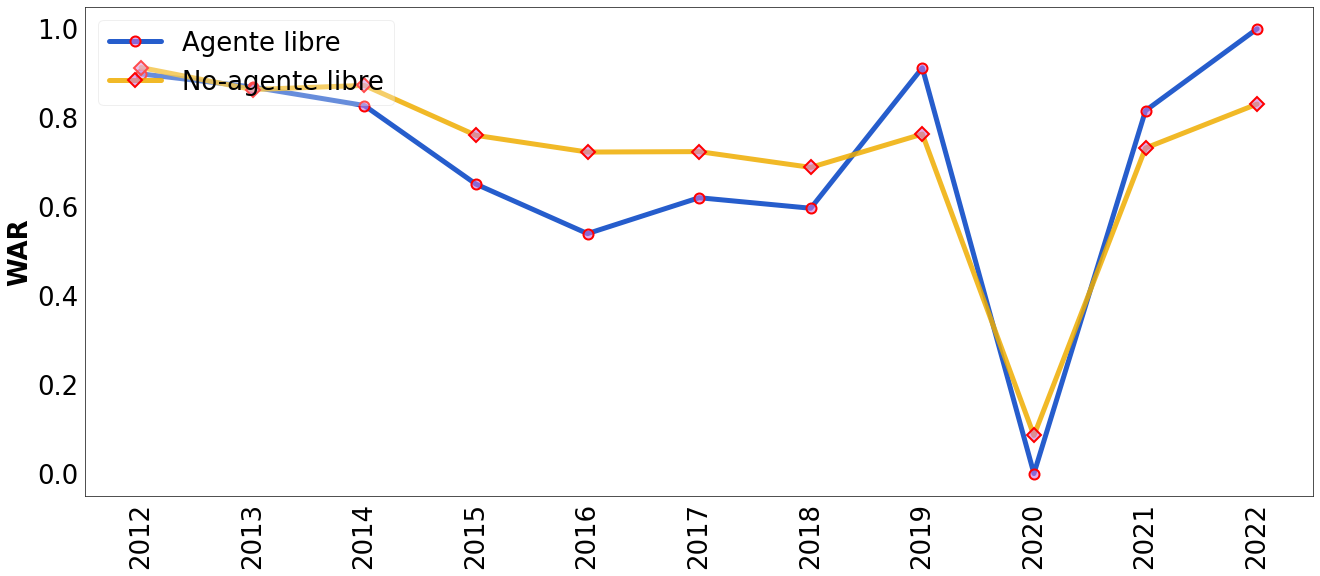

In [41]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    # Bases de datos
    mean_hitter_fa = mean_panel_hitter[mean_panel_hitter['Agente_libre'] == 'Si'][hitter_statistics[i]]
    mean_hitter_no = mean_panel_hitter[(mean_panel_hitter['Agente_libre'] == 'No') & (mean_panel_hitter['Anio'] > 2011)][hitter_statistics[i]]
    # Máximos
    max_hitter = mean_panel_hitter[hitter_statistics[i]].max()
    # Mínimos
    min_hitter = mean_panel_hitter[hitter_statistics[i]].min()
    # Bases normalizadas
    normalized_fa = (mean_hitter_fa - min_hitter)/(max_hitter - min_hitter)
    normalized_no = (mean_hitter_no - min_hitter)/(max_hitter - min_hitter)
    
    axes.plot(temporadas,
              normalized_fa,
              color = (0/255,64/255,196/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'o',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'Agente libre')
    axes.plot(temporadas,
              normalized_no,
              color = (239/255,173/255,1/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'D',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'No-agente libre')
    axes.set_xlabel('Temporadas',
                    fontsize = 16,
                    color = 'black',
                    fontweight = 'bold')
    axes.set_ylabel(hitter_labels[i], 
                    fontsize = 26,
                    color = 'black',
                    fontweight = 'bold')
    axes.tick_params(labelsize = 26,
                     labelcolor = 'black')
    axes.tick_params(axis = 'x',
                     labelrotation = 90)
    legend = plt.legend(loc = 'upper left', 
                    labelcolor = 'black',
                    fontsize = 26,
                    facecolor = 'white',
                    framealpha = 0.3,
                    fancybox = True,
                    frameon = True)
    axes.set(xlabel = None)
    #axes.set(ylabel = None)
    axes.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Line_plot/plot_hitter_" + str(hitter_labels[i]).lower() + ".pdf",
                format = "pdf")

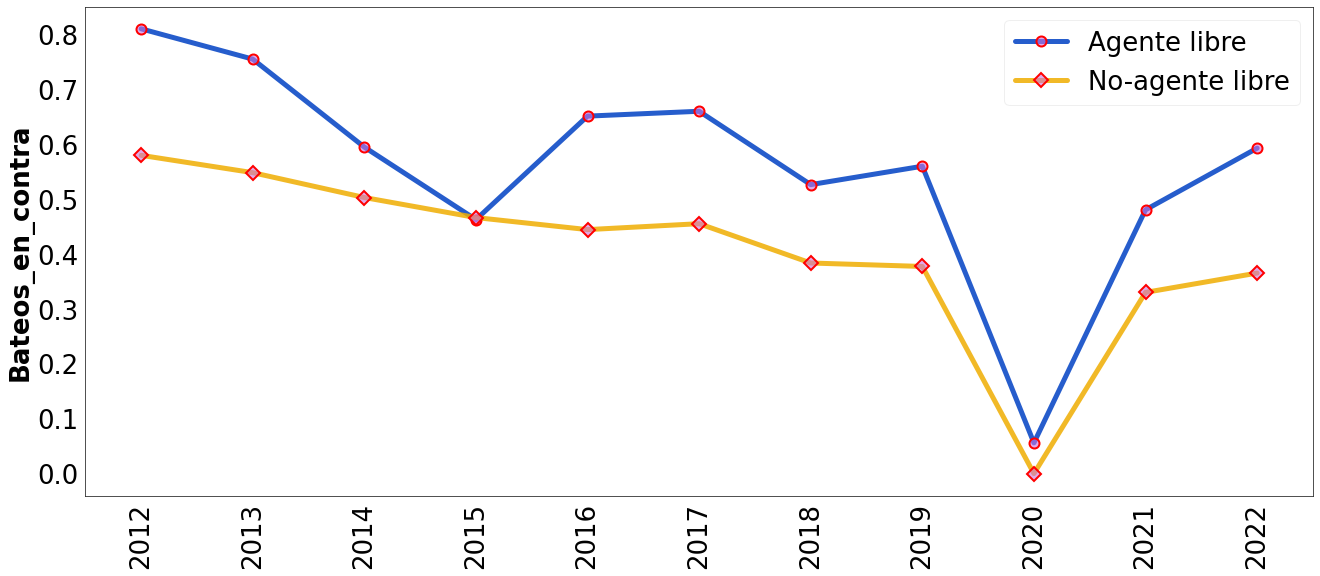

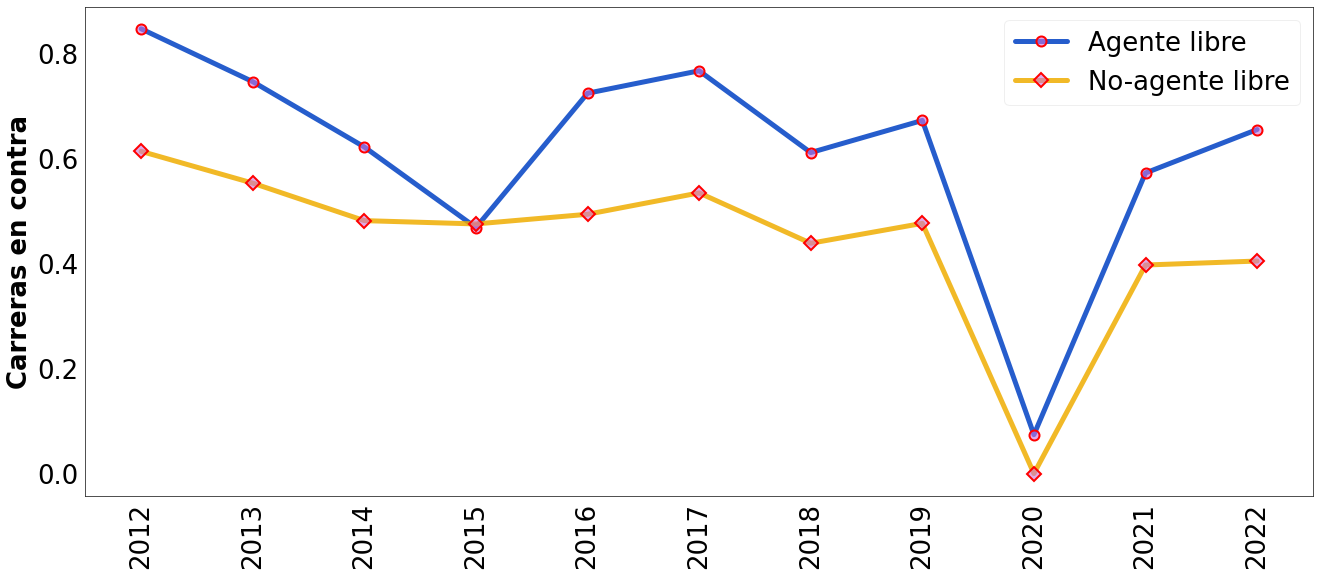

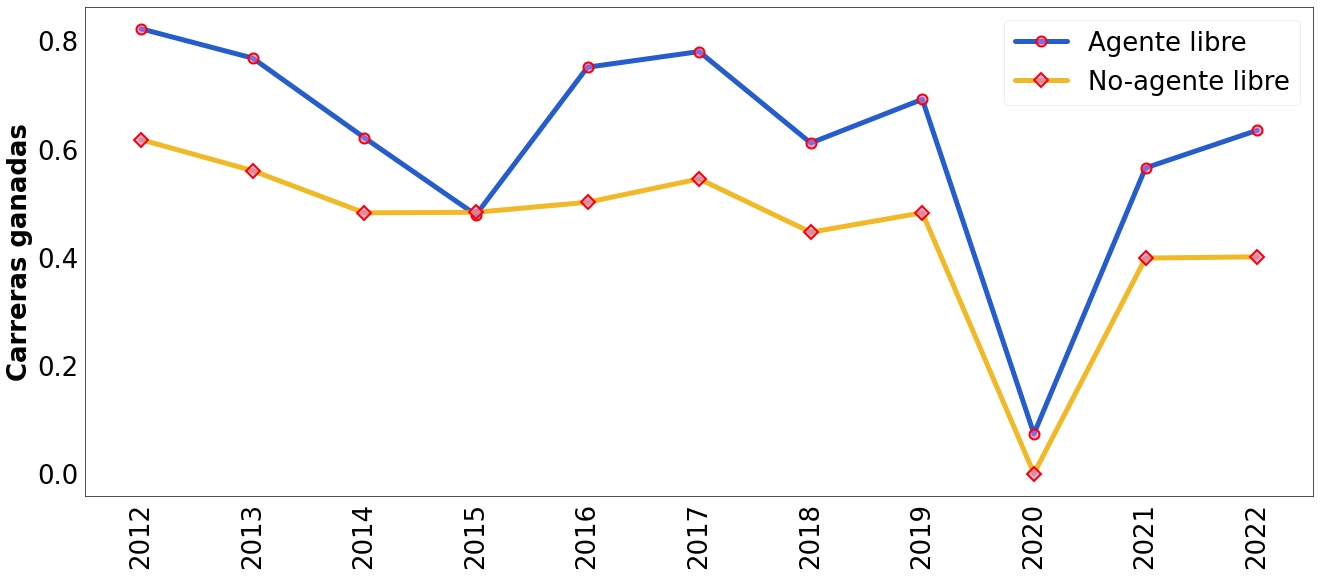

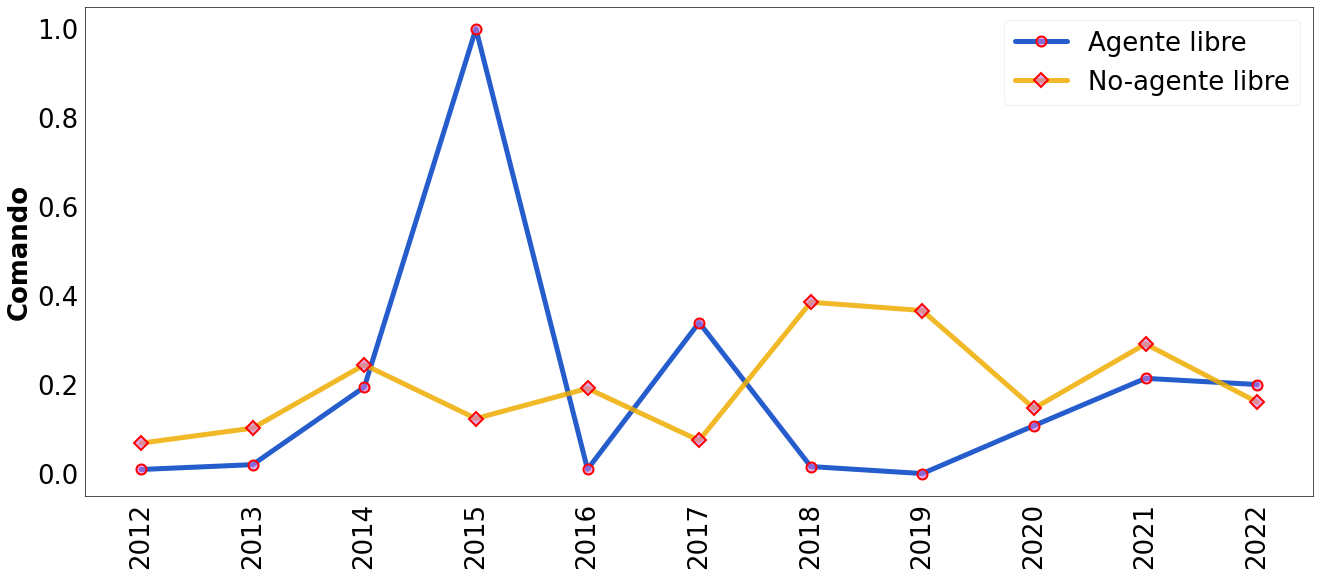

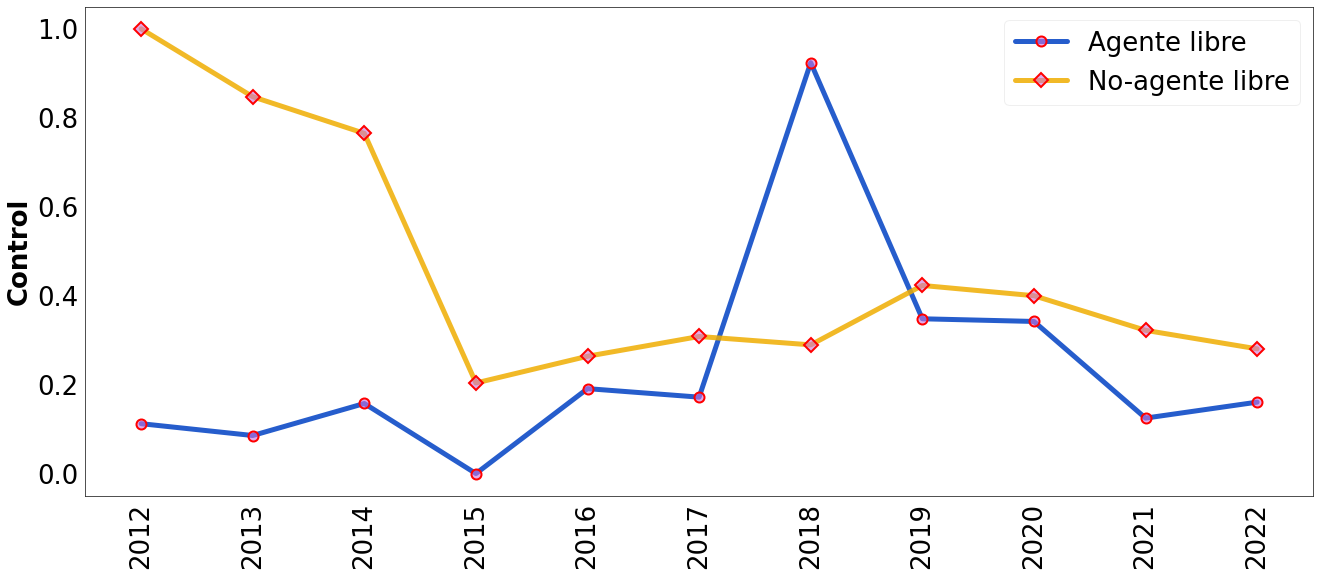

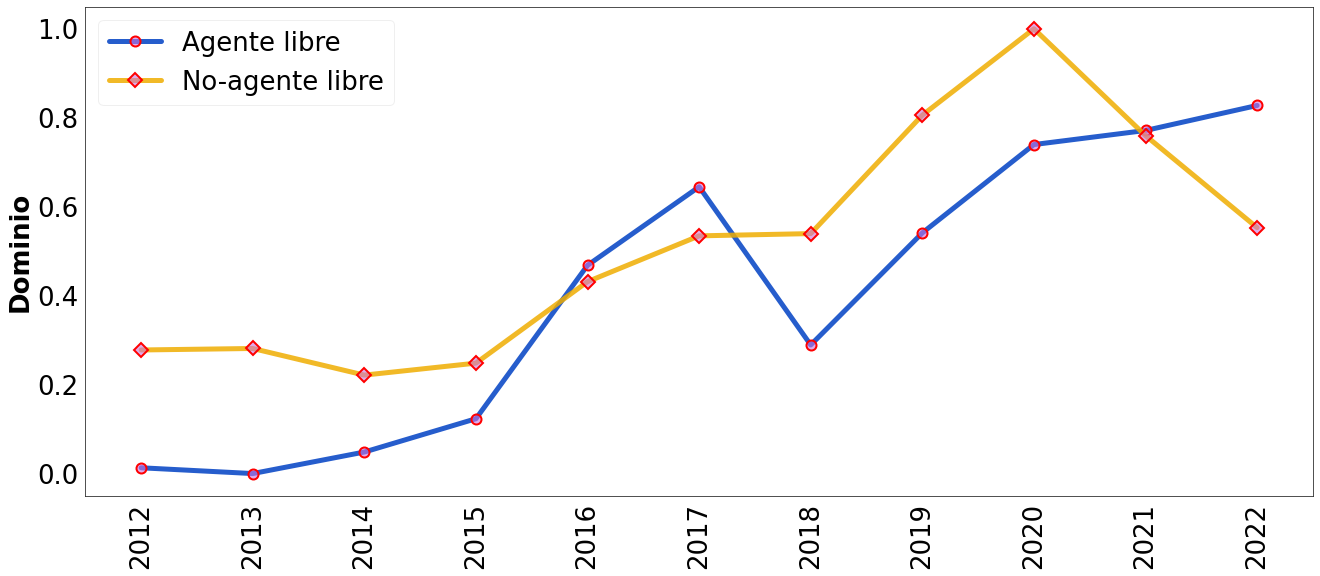

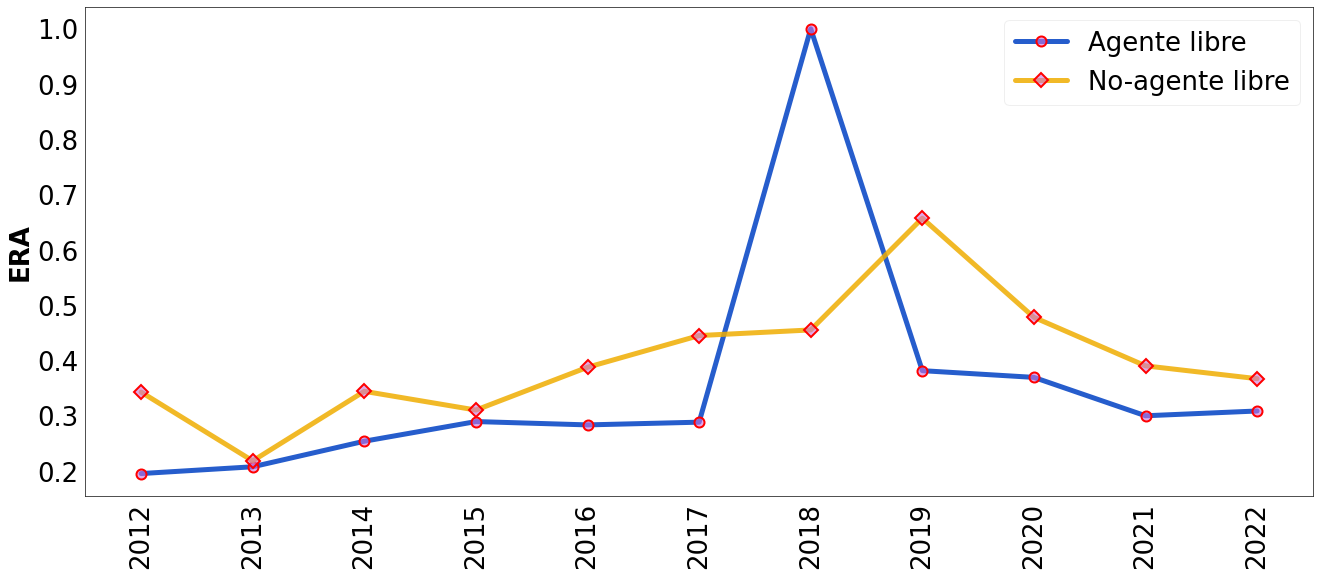

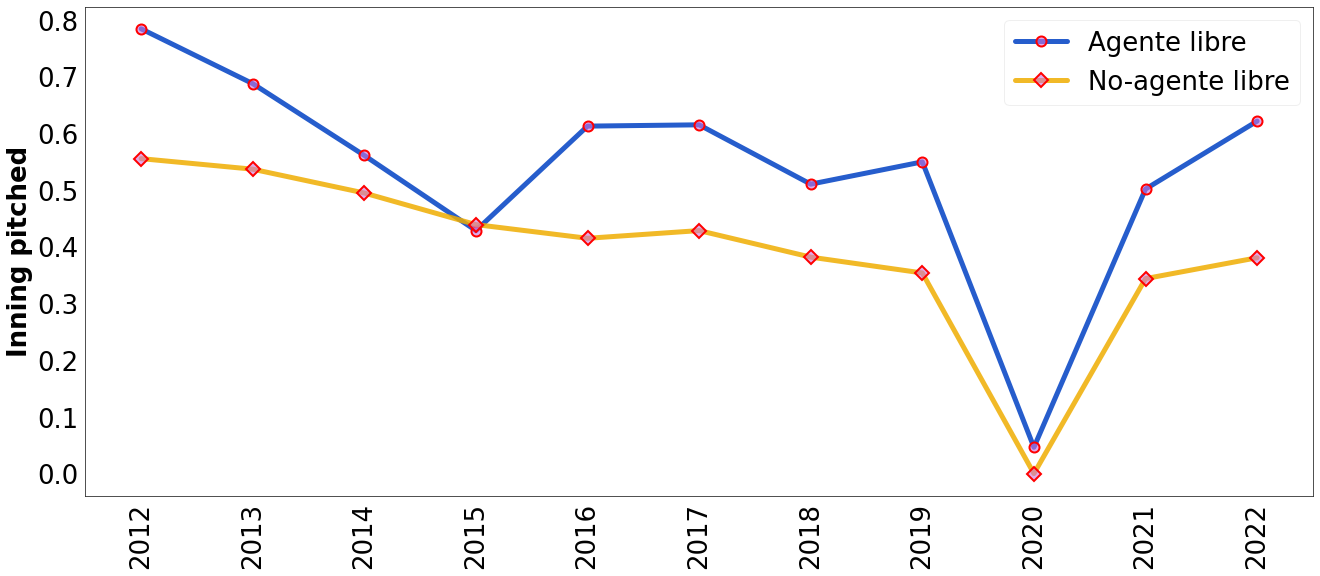

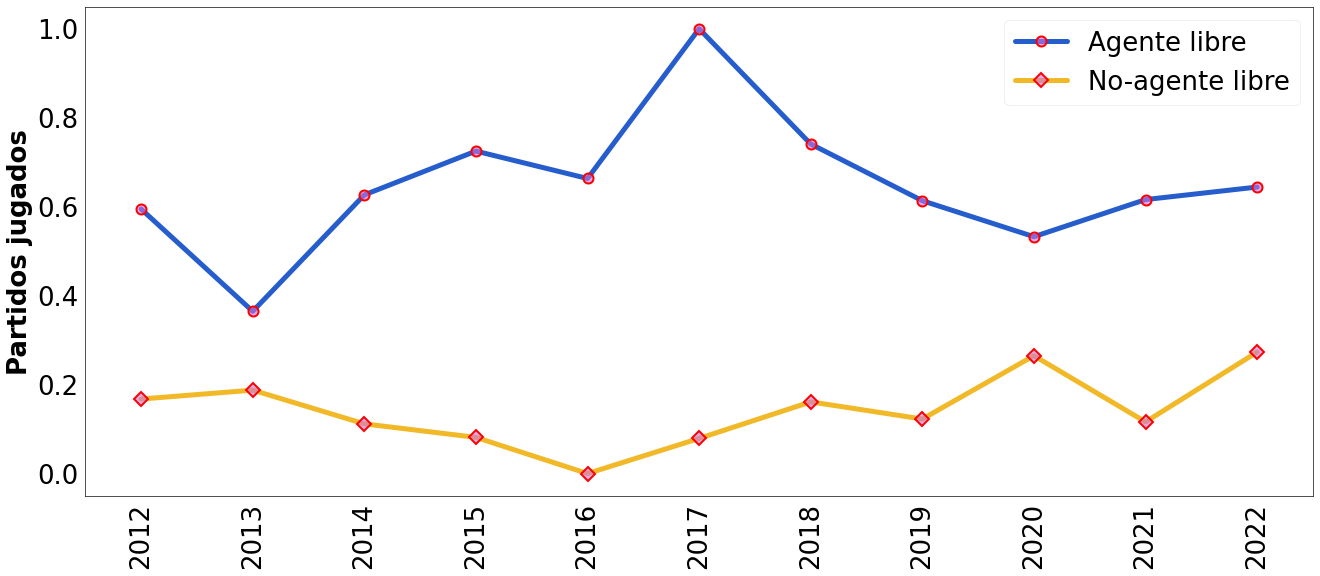

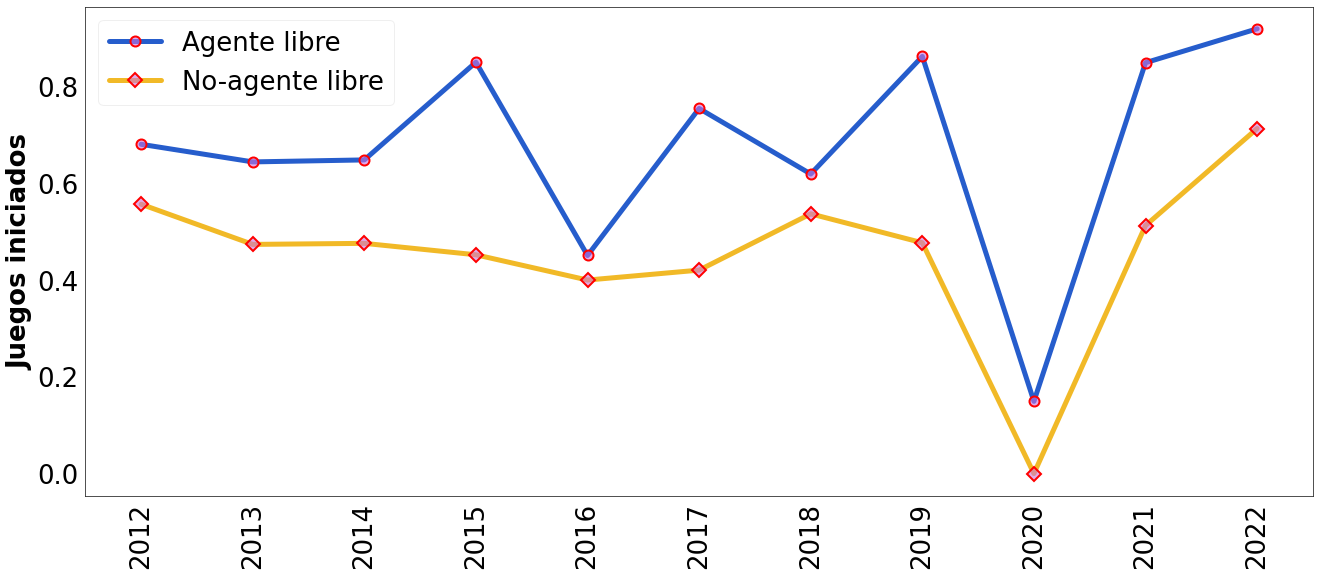

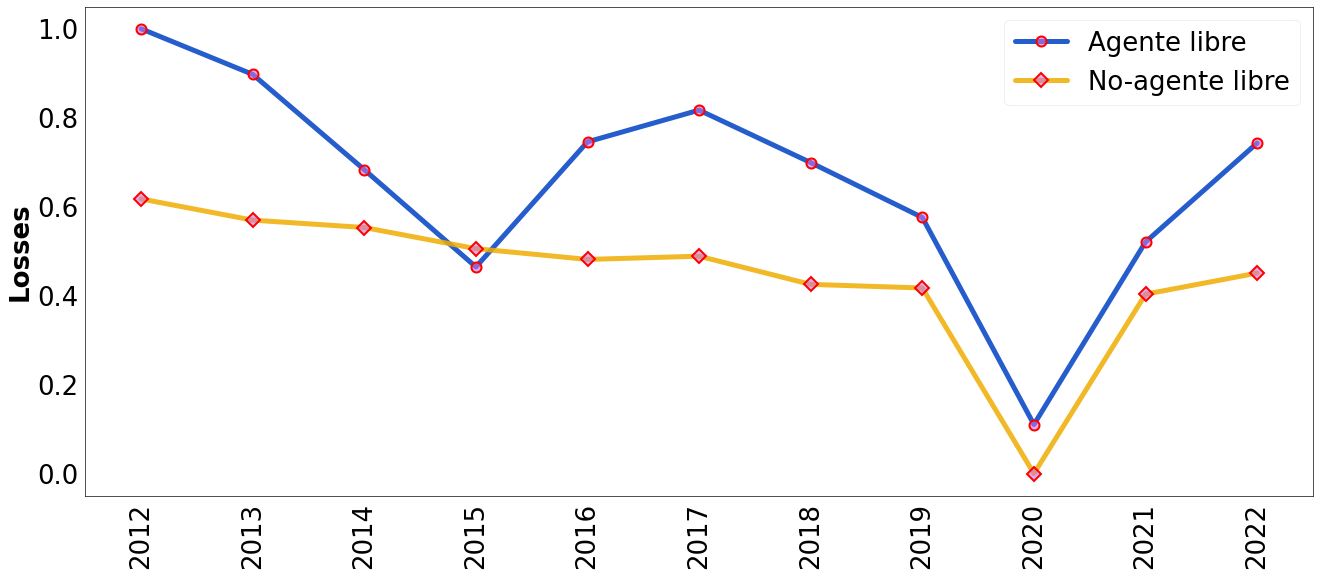

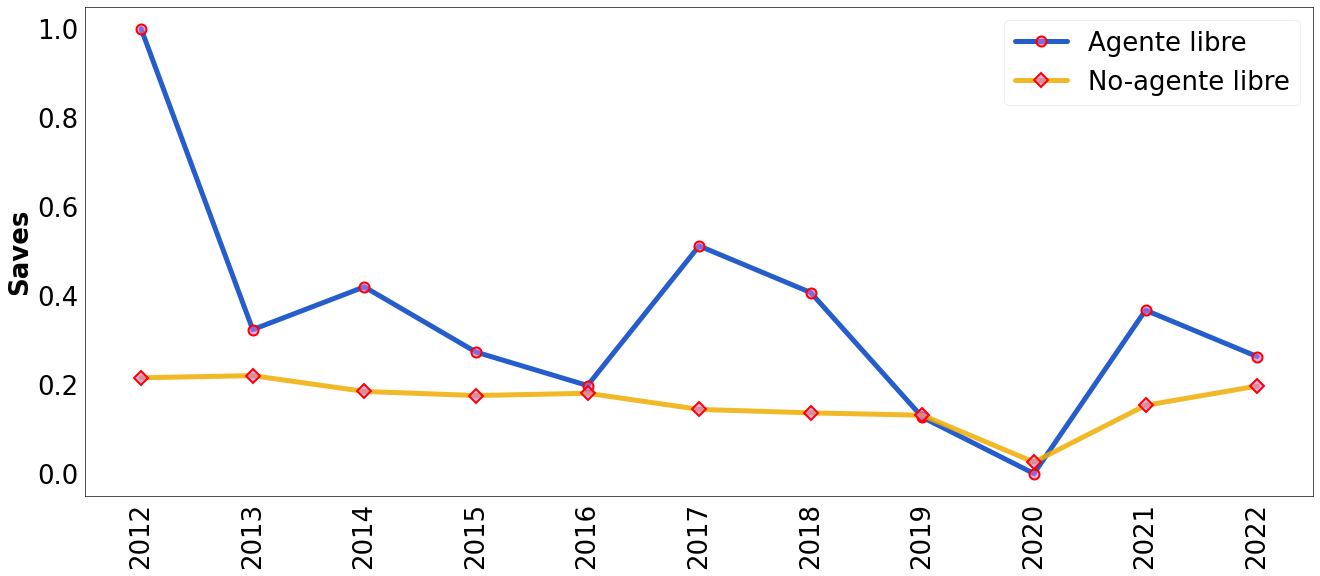

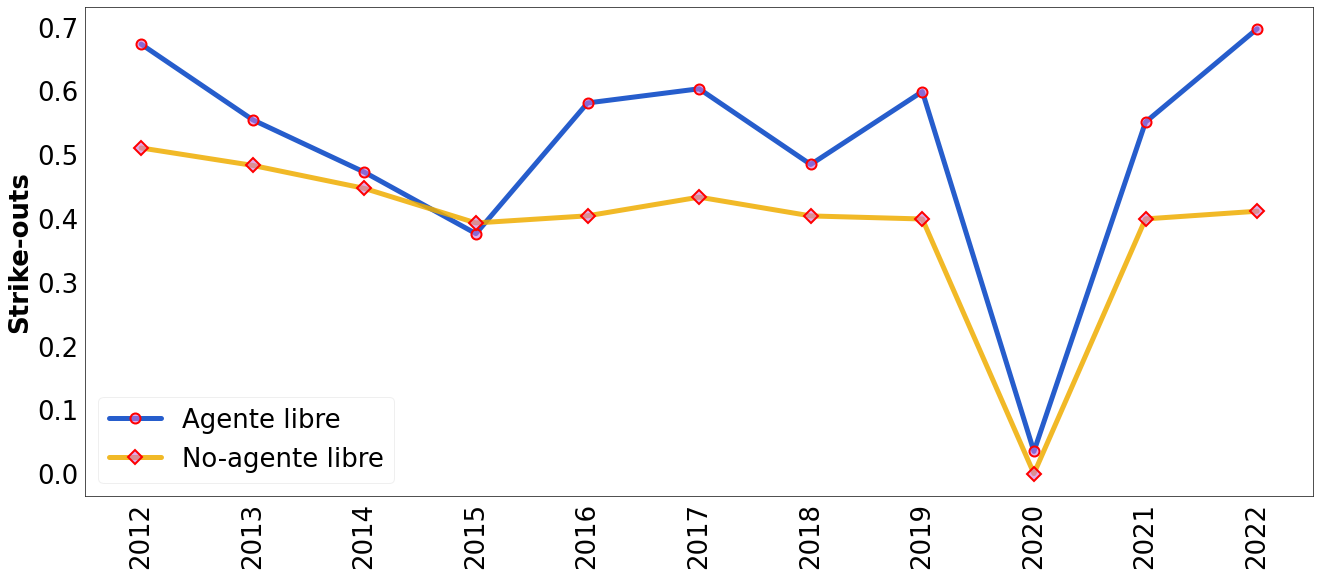

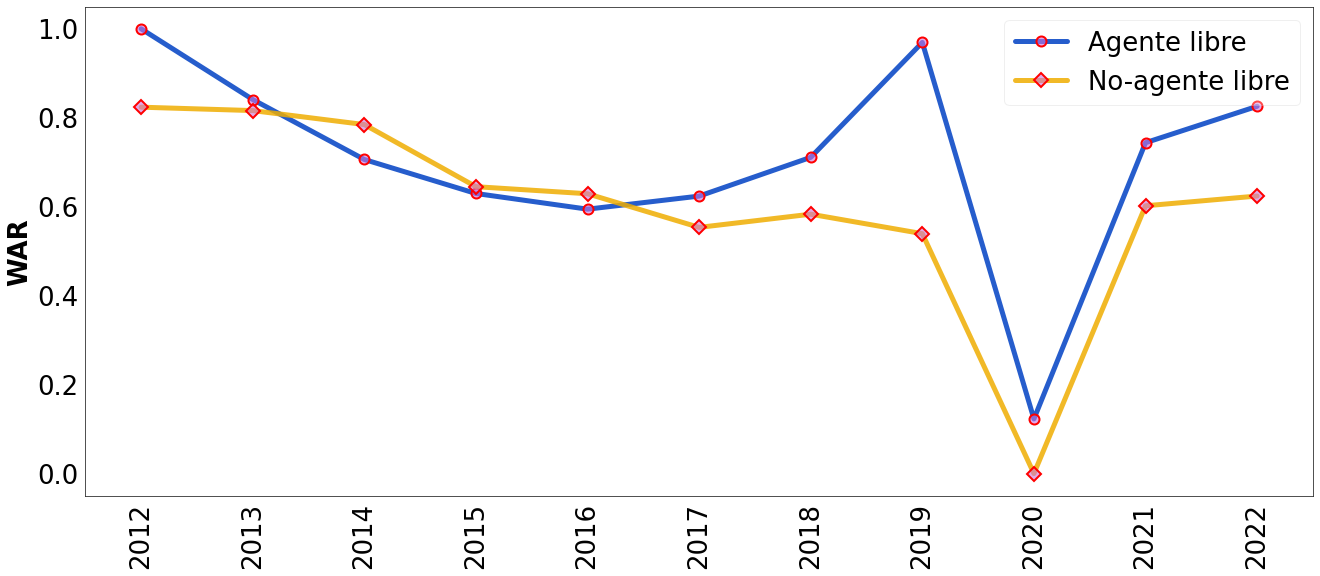

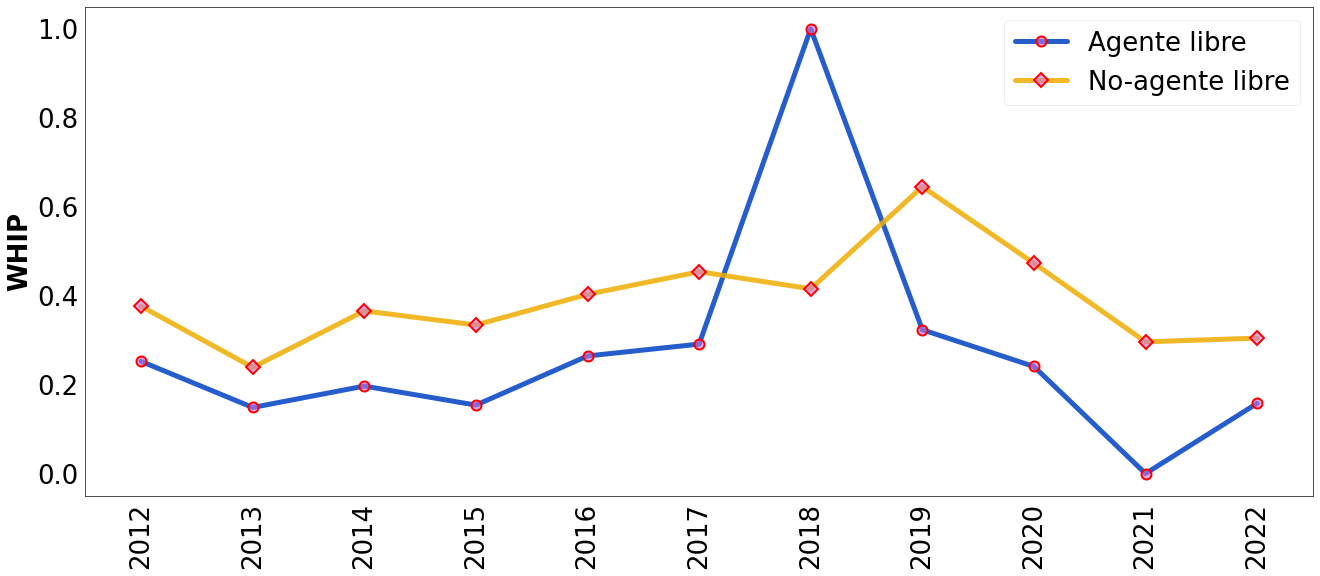

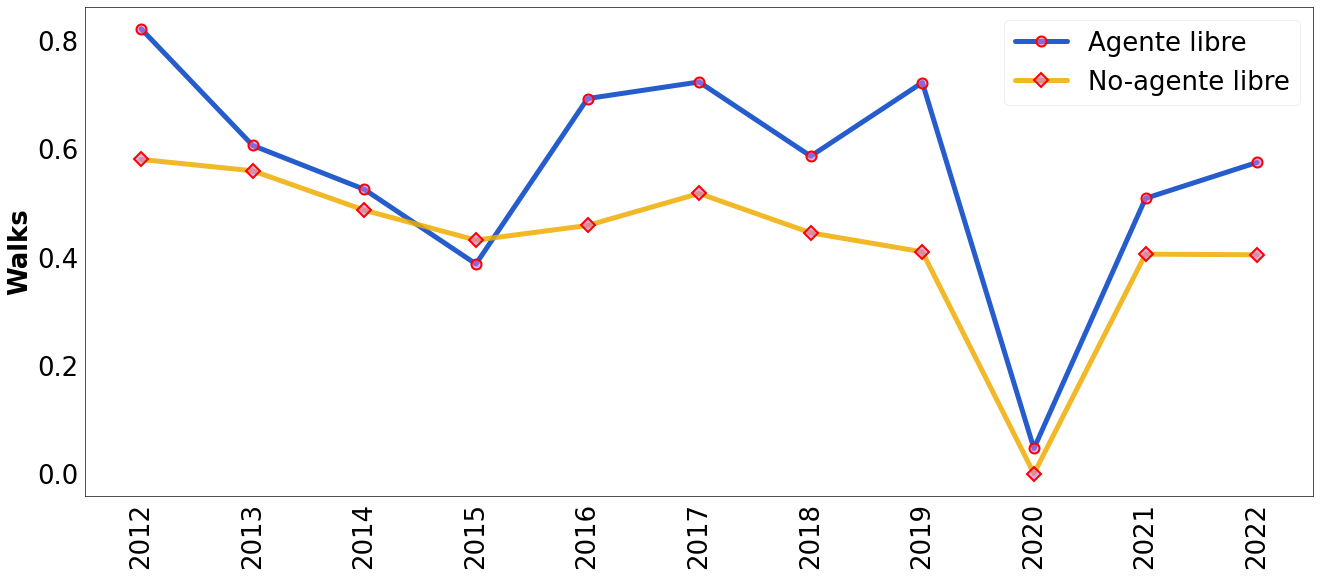

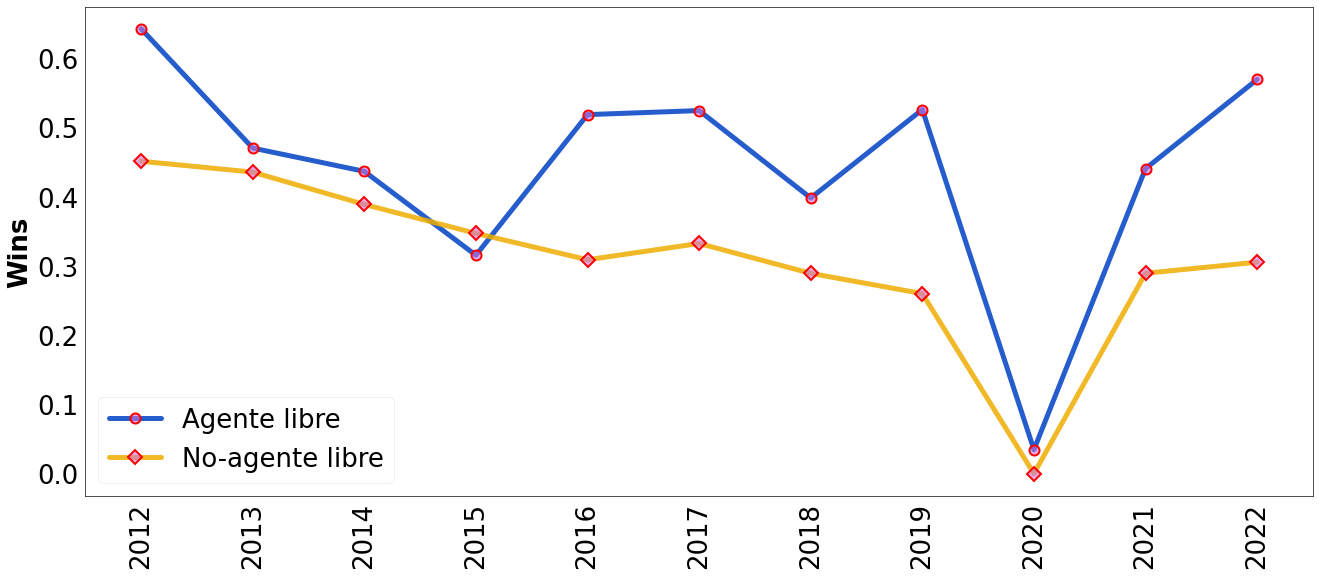

In [42]:
for i in range(0,len(pitcher_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    # Bases de datos
    mean_pitcher_fa = mean_panel_pitcher[mean_panel_pitcher['Agente_libre'] == 'Si'][pitcher_statistics[i]]
    mean_pitcher_no = mean_panel_pitcher[(mean_panel_pitcher['Agente_libre'] == 'No') & (mean_panel_pitcher['Anio'] > 2011)][pitcher_statistics[i]]
    # Máximos
    max_pitcher = mean_panel_pitcher[pitcher_statistics[i]].max()
    # Mínimos
    min_pitcher = mean_panel_pitcher[pitcher_statistics[i]].min()
    # Bases normalizadas
    normalized_fa = (mean_pitcher_fa - min_pitcher)/(max_pitcher - min_pitcher)
    normalized_no = (mean_pitcher_no - min_pitcher)/(max_pitcher - min_pitcher)
    
    axes.plot(temporadas,
              normalized_fa,
              color = (0/255,64/255,196/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'o',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'Agente libre')
    axes.plot(temporadas,
              normalized_no,
              color = (239/255,173/255,1/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'D',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'No-agente libre')
    axes.set_xlabel('Temporadas',
                    fontsize = 16,
                    color = 'black',
                    fontweight = 'bold')
    axes.set_ylabel(pitcher_labels[i], 
                    fontsize = 26,
                    color = 'black',
                    fontweight = 'bold')
    axes.tick_params(labelsize = 26,
                     labelcolor = 'black')
    axes.tick_params(axis = 'x',
                     labelrotation = 90)
    legend = plt.legend(loc = 'best', 
                    labelcolor = 'black',
                    fontsize = 26,
                    facecolor = 'white',
                    framealpha = 0.3,
                    fancybox = True,
                    frameon = True)
    axes.set(xlabel = None)
    #axes.set(ylabel = None)
    axes.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Line_plot/plot_pitcher_" + str(pitcher_labels[i]).lower() + ".pdf",
                format = "pdf")

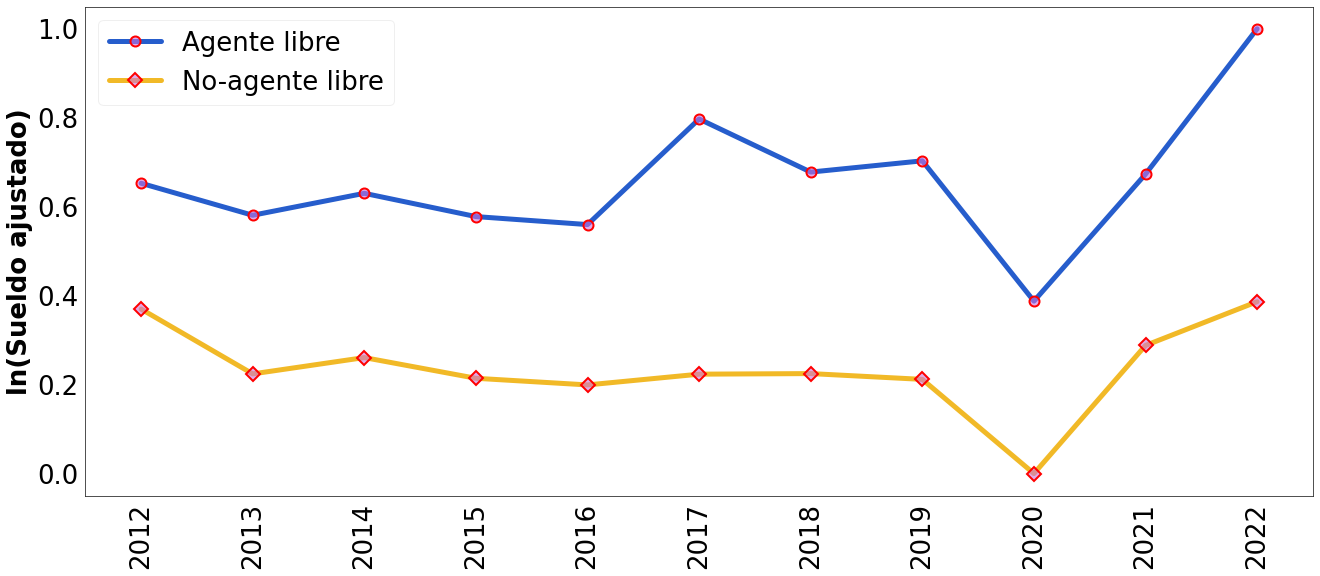

In [43]:
sns.set_style('white')
fig,axes = plt.subplots(figsize = (22,9)) 
# Bases de datos
mean_hitter_fa = mean_panel_hitter[mean_panel_hitter['Agente_libre'] == 'Si']['ln_Sueldo_ajustado']
mean_hitter_no = mean_panel_hitter[(mean_panel_hitter['Agente_libre'] == 'No') & (mean_panel_hitter['Anio'] > 2011)]['ln_Sueldo_ajustado']
# Máximos
max_hitter = mean_panel_hitter['ln_Sueldo_ajustado'].max()
# Mínimos
min_hitter = mean_panel_hitter['ln_Sueldo_ajustado'].min()
# Bases normalizadas
normalized_fa = (mean_hitter_fa - min_hitter)/(max_hitter - min_hitter)
normalized_no = (mean_hitter_no - min_hitter)/(max_hitter - min_hitter)

axes.plot(temporadas,
          normalized_fa,
          color = (0/255,64/255,196/255,0.85),
          markerfacecolor = (205/255,114/255,220/255,0.6),
          marker = 'o',
          markersize = 10,
          markeredgecolor = 'red',
          markeredgewidth = 2,
          linewidth = 5,
          label = 'Agente libre')
axes.plot(temporadas,
          normalized_no,
          color = (239/255,173/255,1/255,0.85),
          markerfacecolor = (205/255,114/255,220/255,0.6),
          marker = 'D',
          markersize = 10,
          markeredgecolor = 'red',
          markeredgewidth = 2,
          linewidth = 5,
          label = 'No-agente libre')
axes.set_xlabel('Temporadas',
                fontsize = 16,
                color = 'black',
                fontweight = 'bold')
axes.set_ylabel('ln(Sueldo ajustado)', 
                fontsize = 26,
                color = 'black',
                fontweight = 'bold')
axes.tick_params(labelsize = 26,
                 labelcolor = 'black')
axes.tick_params(axis = 'x',
                 labelrotation = 90)
legend = plt.legend(loc = 'upper left', 
                labelcolor = 'black',
                fontsize = 26,
                facecolor = 'white',
                framealpha = 0.3,
                fancybox = True,
                frameon = True)
axes.set(xlabel = None)
#axes.set(ylabel = None)
axes.patch.set_facecolor('white')

plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Line_plot/plot_hitter_ln_sueldo_regular.pdf",
            format = "pdf")

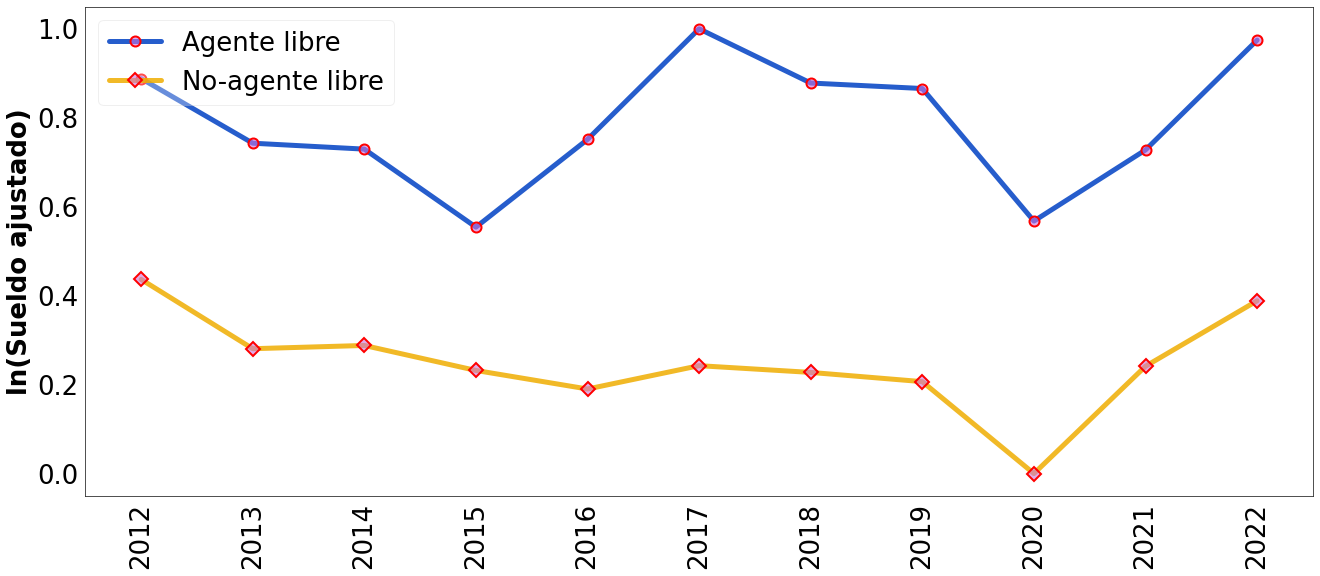

In [44]:
sns.set_style('white')
fig,axes = plt.subplots(figsize = (22,9))
# Bases de datos
mean_pitcher_fa = mean_panel_pitcher[mean_panel_pitcher['Agente_libre'] == 'Si']['ln_Sueldo_ajustado']
mean_pitcher_no = mean_panel_pitcher[(mean_panel_pitcher['Agente_libre'] == 'No') & (mean_panel_pitcher['Anio'] > 2011)]['ln_Sueldo_ajustado']
# Máximos
max_pitcher = mean_panel_pitcher['ln_Sueldo_ajustado'].max()
# Mínimos
min_pitcher = mean_panel_pitcher['ln_Sueldo_ajustado'].min()
# Bases normalizadas
normalized_fa = (mean_pitcher_fa - min_pitcher)/(max_pitcher - min_pitcher)
normalized_no = (mean_pitcher_no - min_pitcher)/(max_pitcher - min_pitcher)

axes.plot(temporadas,
          normalized_fa,
          color = (0/255,64/255,196/255,0.85),
          markerfacecolor = (205/255,114/255,220/255,0.6),
          marker = 'o',
          markersize = 10,
          markeredgecolor = 'red',
          markeredgewidth = 2,
          linewidth = 5,
          label = 'Agente libre')
axes.plot(temporadas,
          normalized_no,
          color = (239/255,173/255,1/255,0.85),
          markerfacecolor = (205/255,114/255,220/255,0.6),
          marker = 'D',
          markersize = 10,
          markeredgecolor = 'red',
          markeredgewidth = 2,
          linewidth = 5,
          label = 'No-agente libre')
axes.set_xlabel('Temporadas',
                fontsize = 16,
                color = 'black',
                fontweight = 'bold')
axes.set_ylabel('ln(Sueldo ajustado)', 
                fontsize = 26,
                color = 'black',
                fontweight = 'bold')
axes.tick_params(labelsize = 26,
                 labelcolor = 'black')
axes.tick_params(axis = 'x',
                 labelrotation = 90)
legend = plt.legend(loc = 'upper left', 
                labelcolor = 'black',
                fontsize = 26,
                facecolor = 'white',
                framealpha = 0.3,
                fancybox = True,
                frameon = True)
axes.set(xlabel = None)
#axes.set(ylabel = None)
axes.patch.set_facecolor('white')

plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Line_plot/plot_pitcher_ln_sueldo_regular.pdf",
            format = "pdf")

## Diagramas de densidad

Primero, calcularemos los ancho de ventana óptimas

In [37]:
# Agentes libres
fa_pitcher_binwidth = [0]*len(pitcher_statistics)
fa_hitter_binwidth = [0]*len(hitter_statistics)
# Mo agentes libres
no_pitcher_binwidth = [0]*len(pitcher_statistics)
no_hitter_binwidth = [0]*len(hitter_statistics)

In [38]:
# Pitchers:
for i in range(0,len(pitcher_statistics)):
    # Filtered df
    fa_pitcher_filtered = mean_panel_pitcher[mean_panel_pitcher['Agente_libre'] == 'Si']
    no_pitcher_filtered = mean_panel_pitcher[mean_panel_pitcher['Agente_libre'] == 'No']
    
    # Agentes libres pitchers:
    delta = 1.7188 # Ver CT
    w_sd = fa_pitcher_filtered[pitcher_statistics[i]].std()
    q1, q3 = np.percentile(fa_pitcher_filtered[pitcher_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = fa_pitcher_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    fa_pitcher_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda
    
    # No-agentes libres pitchers:
    delta = 1.7188 # Ver CT
    w_sd = no_pitcher_filtered[pitcher_statistics[i]].std()
    q1, q3 = np.percentile(no_pitcher_filtered[pitcher_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = no_pitcher_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    no_pitcher_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda

# Hitters:
for i in range(0,len(hitter_statistics)): 
    # Filtered df
    fa_hitter_filtered = mean_panel_hitter[mean_panel_hitter['Agente_libre'] == 'Si']
    no_hitter_filtered = mean_panel_hitter[mean_panel_hitter['Agente_libre'] == 'No']
    
    # Agentes libres pitchers:
    delta = 1.7188 # Ver CT
    w_sd = fa_hitter_filtered[hitter_statistics[i]].std()
    q1, q3 = np.percentile(fa_hitter_filtered[hitter_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = fa_hitter_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    fa_hitter_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda
    
    # No-agentes libres:
    delta = 1.7188 # Ver CT
    w_sd = no_hitter_filtered[hitter_statistics[i]].std()
    q1, q3 = np.percentile(no_hitter_filtered[hitter_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = no_hitter_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    no_hitter_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda

Bateos_en_contra
Carreras_en_contra
Carreras_ganadas
Comando
Control
Dominio
ERA
Inning_pitched
Porcentaje_juegos
Juegos_iniciados
Losses
Saves
Strike-outs
WAR
WHIP
Walks
Wins


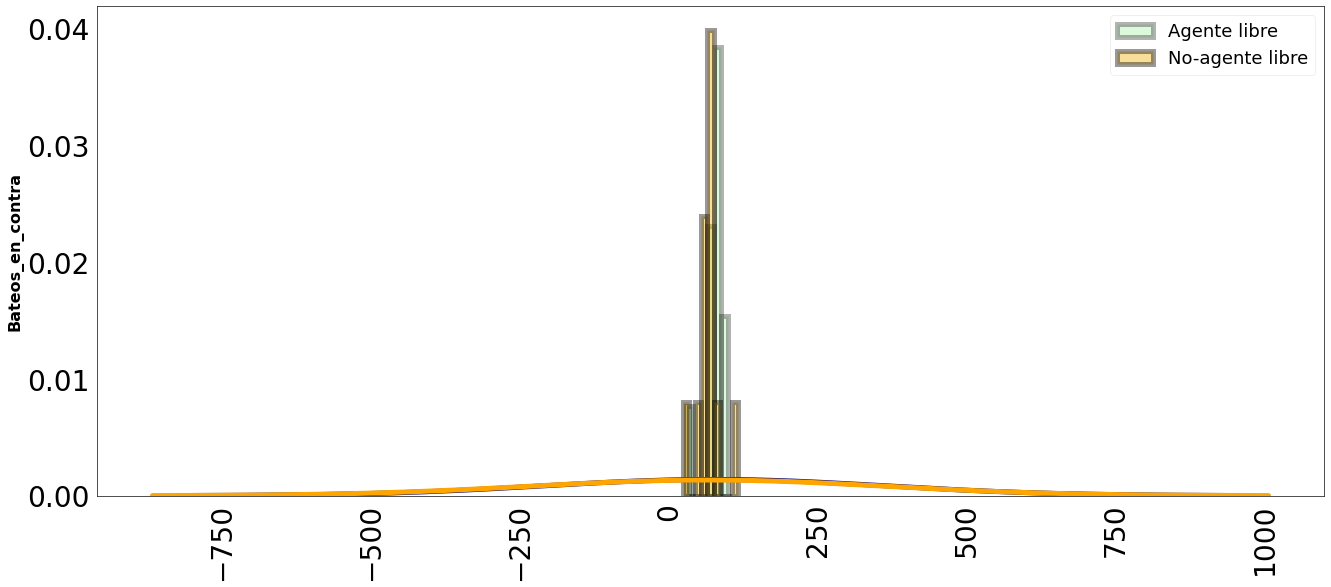

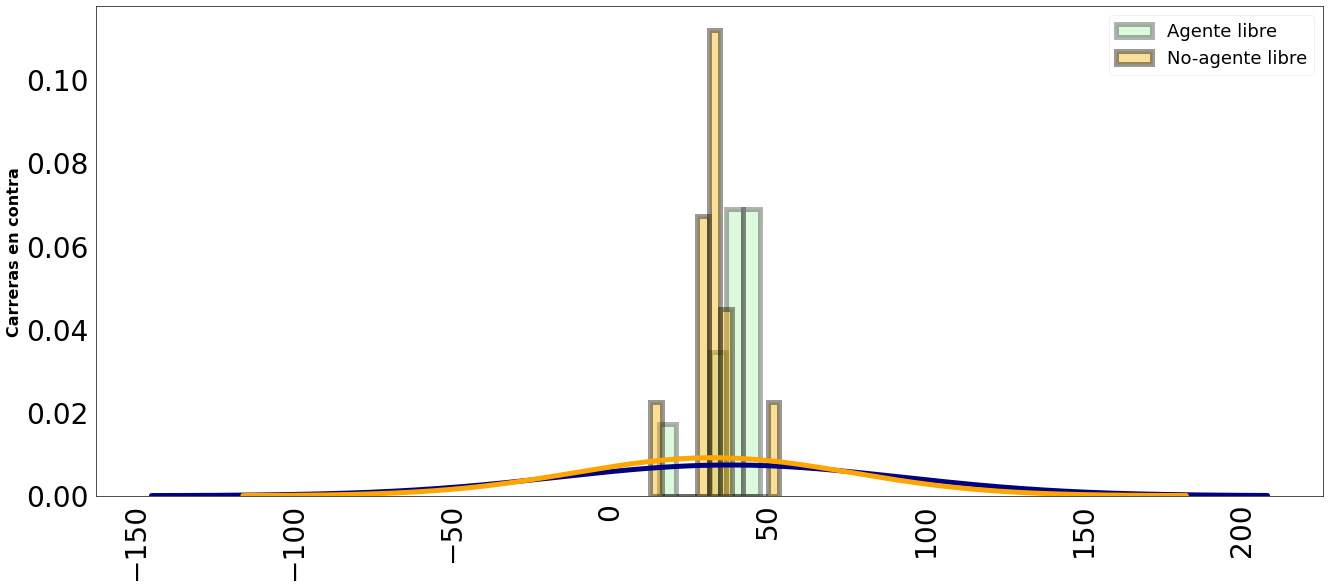

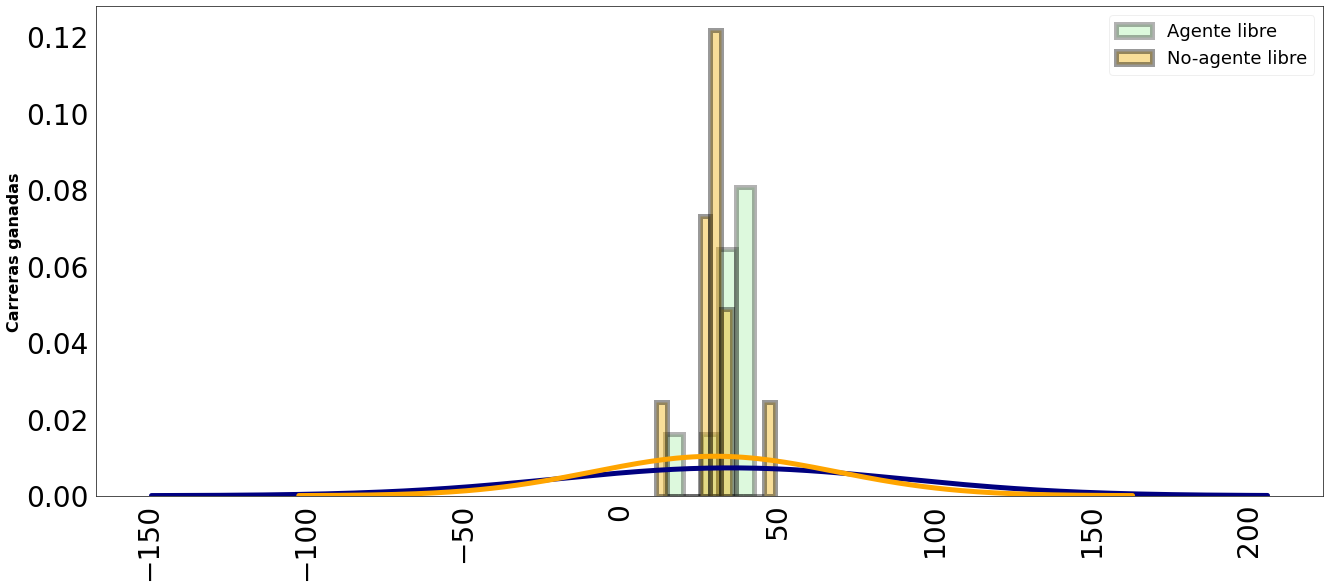

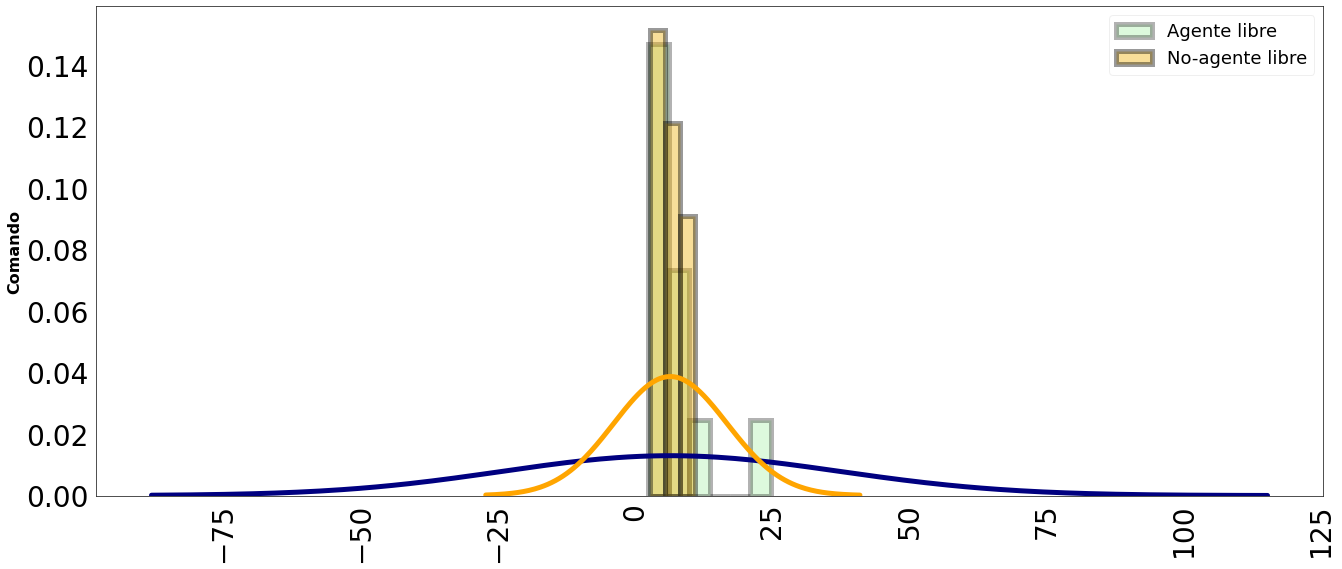

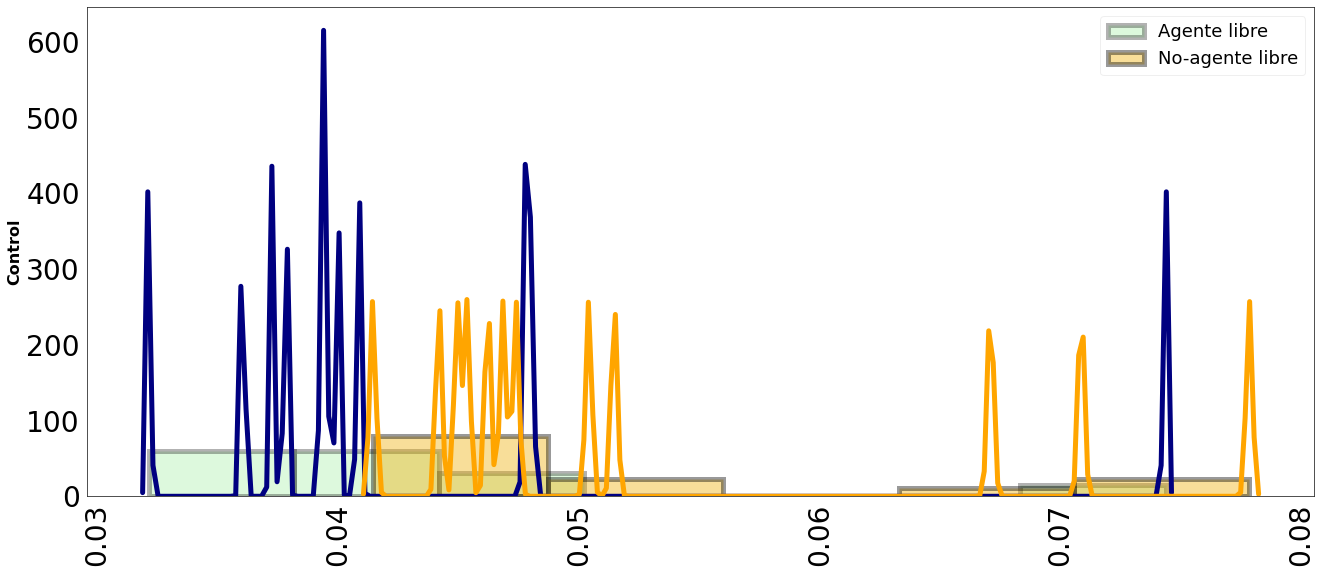

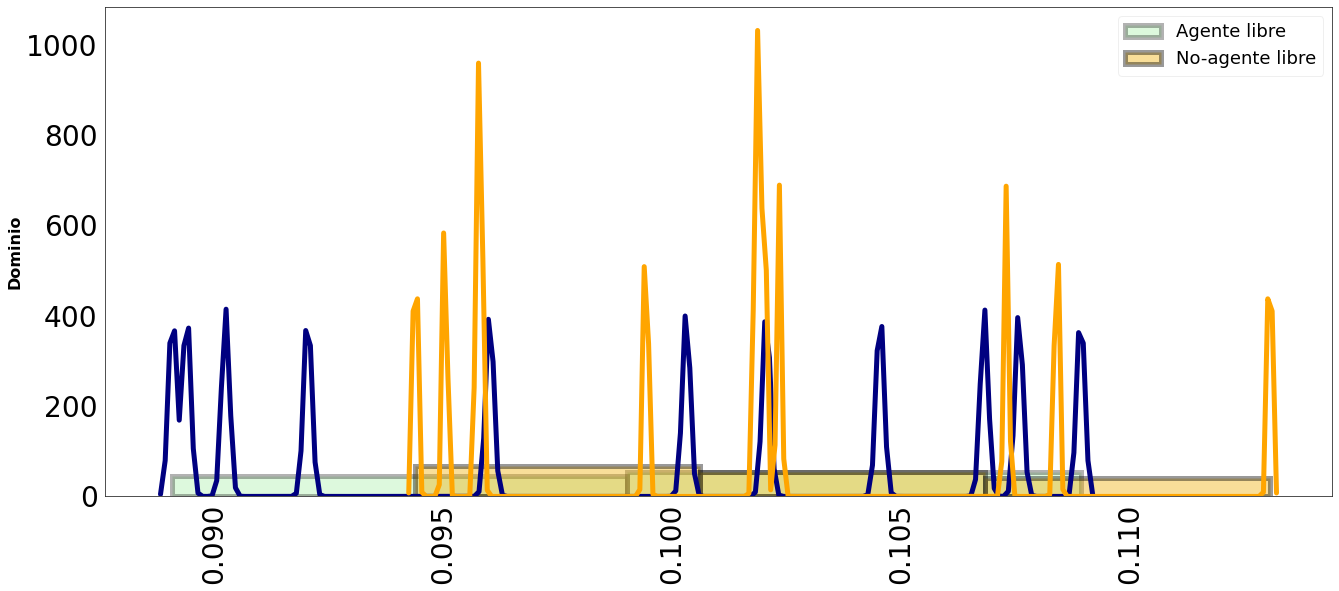

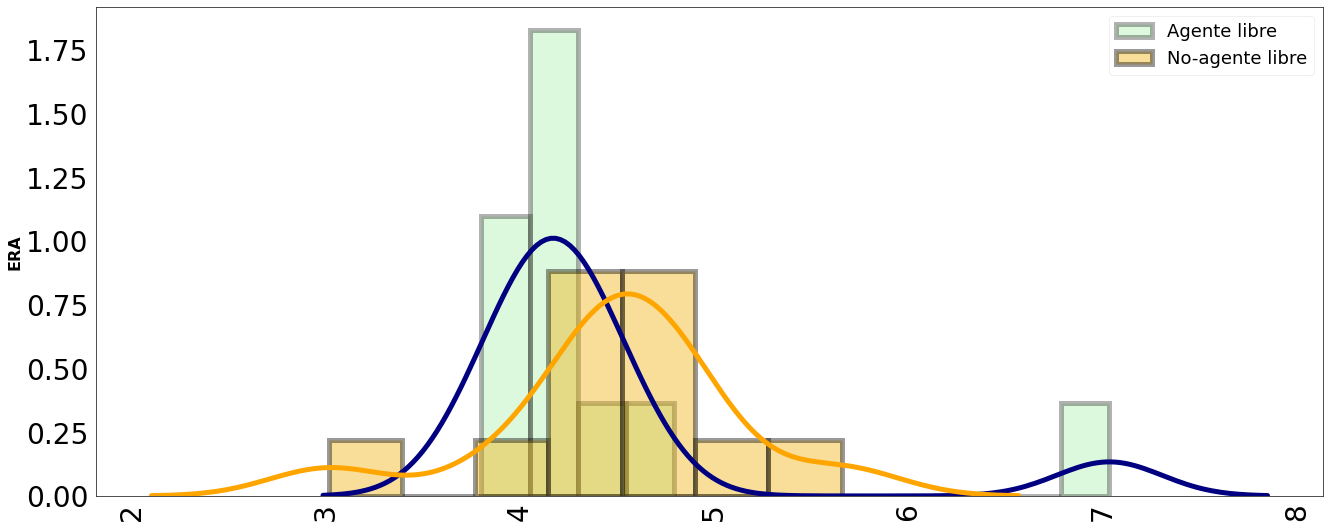

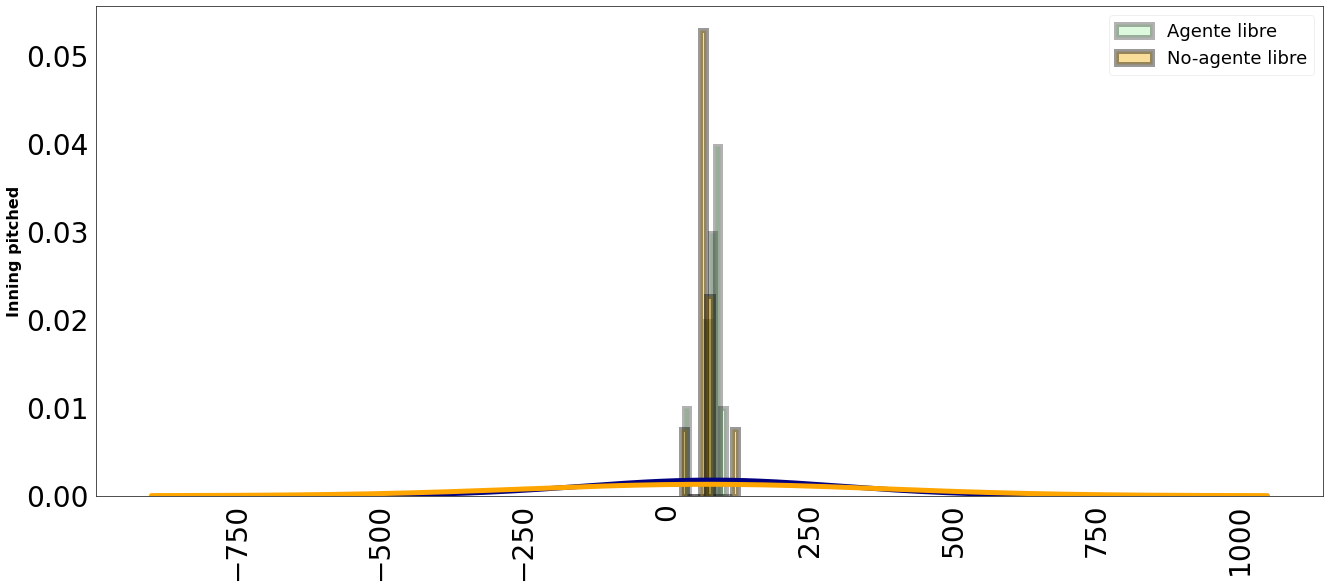

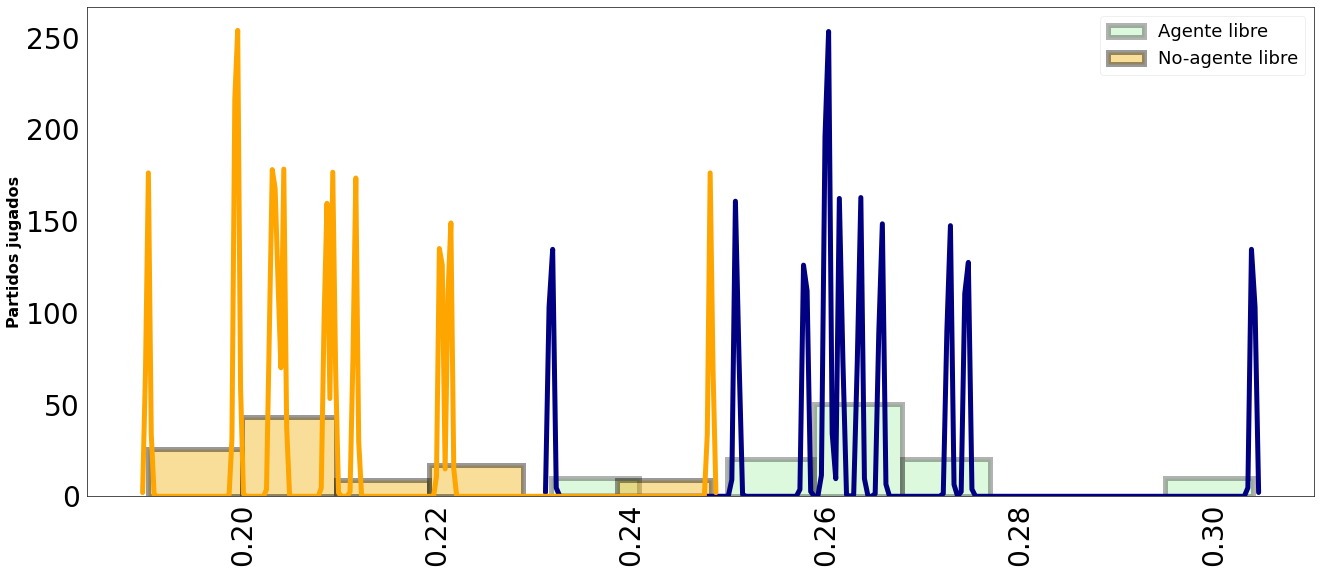

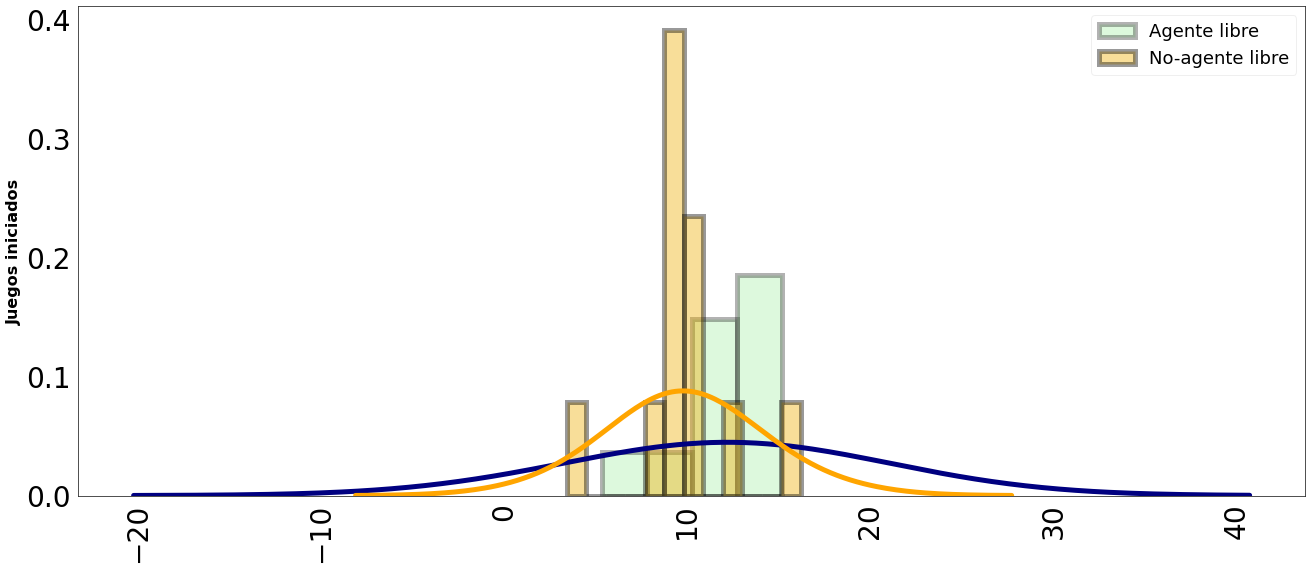

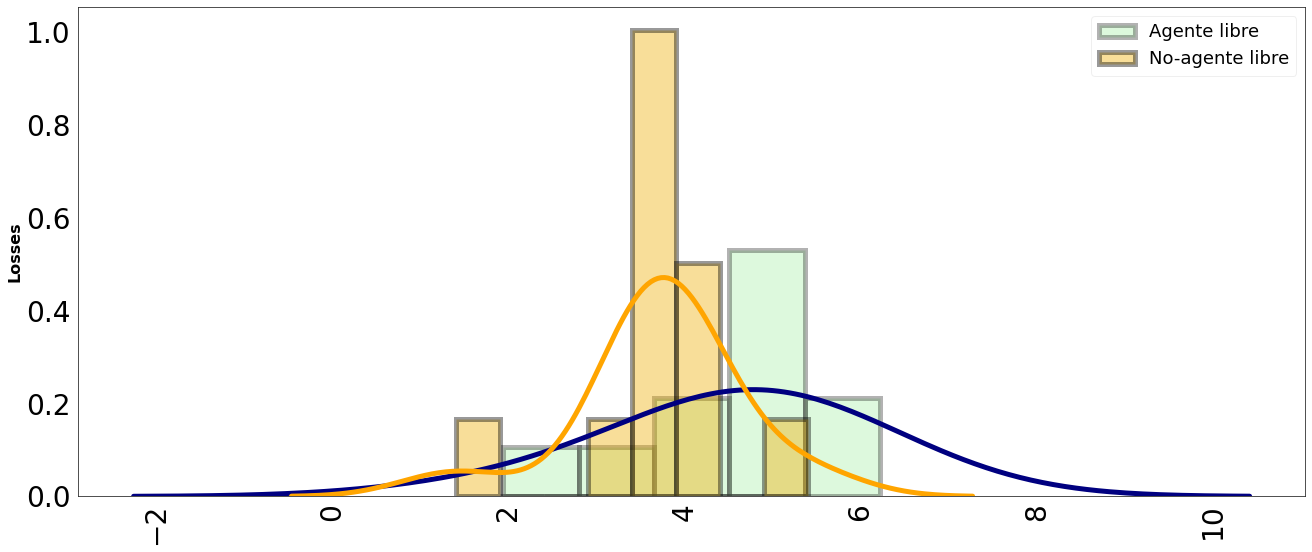

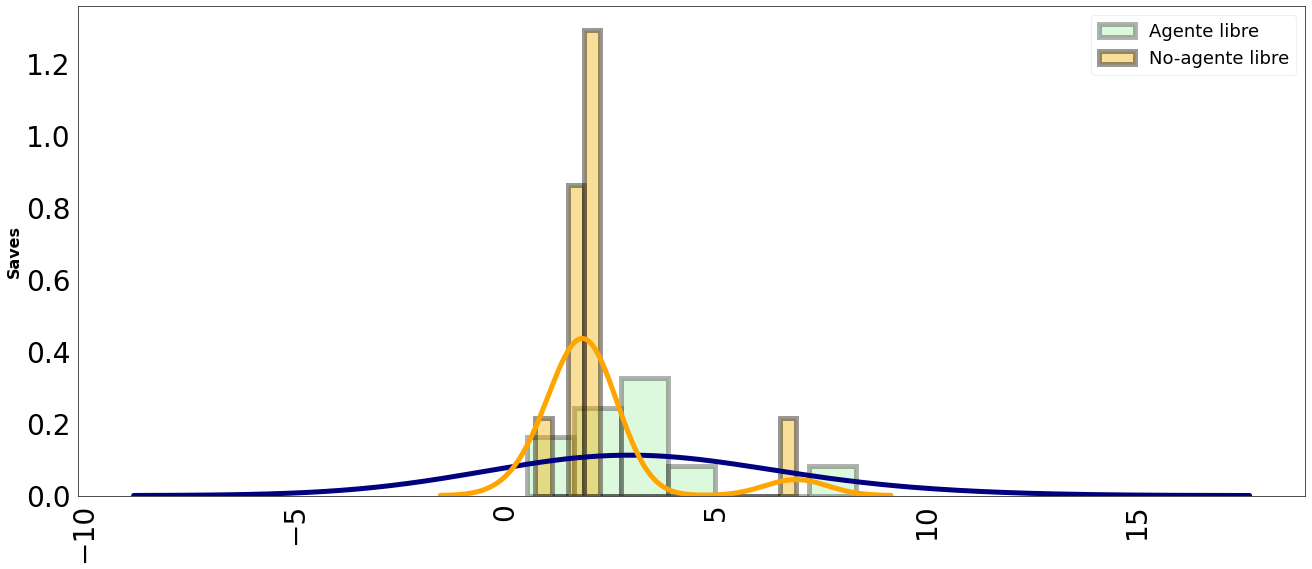

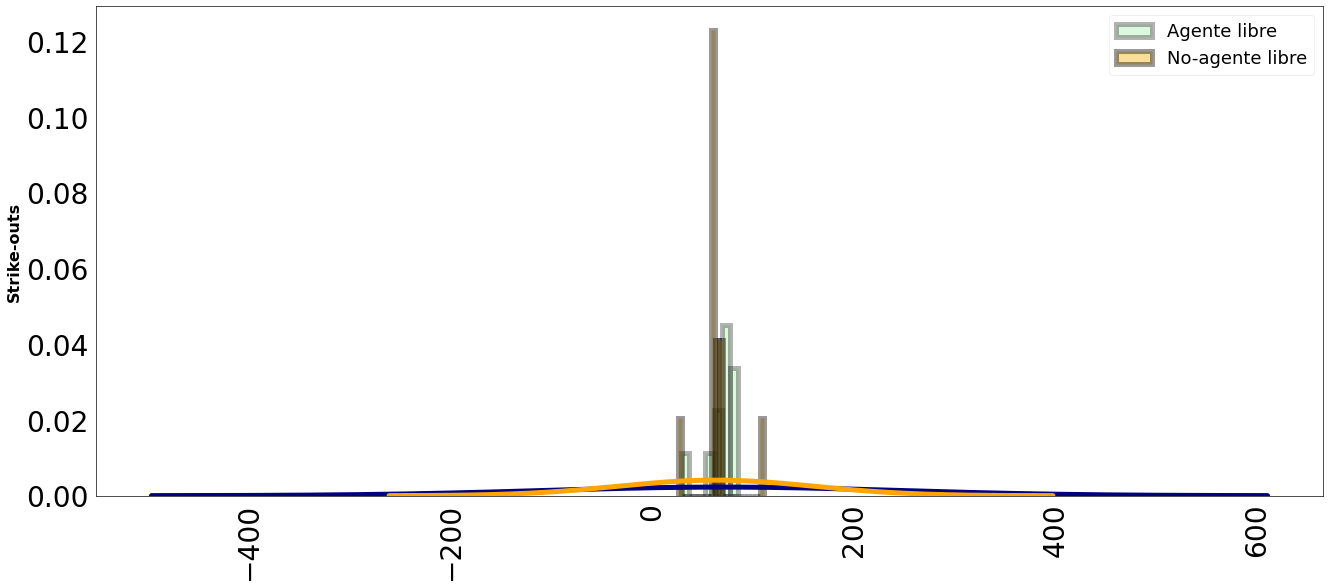

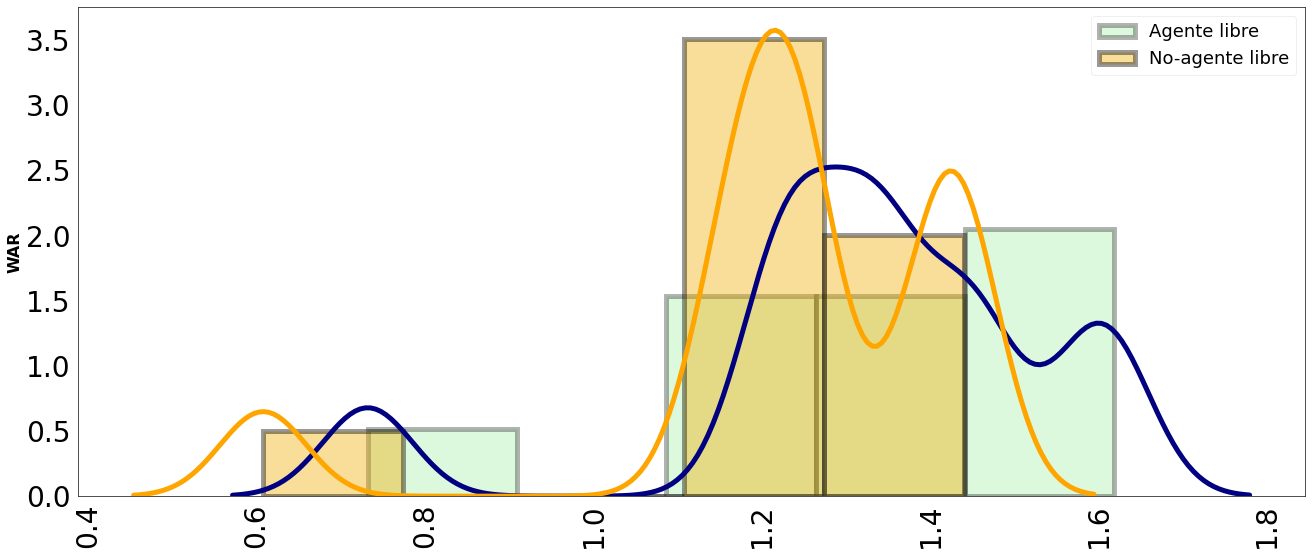

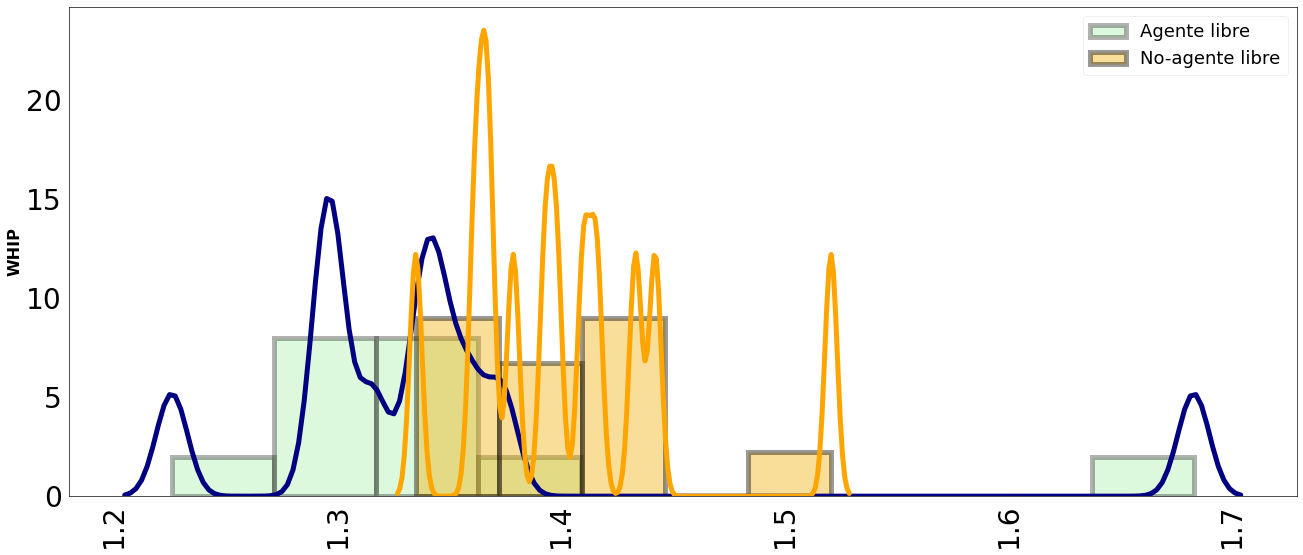

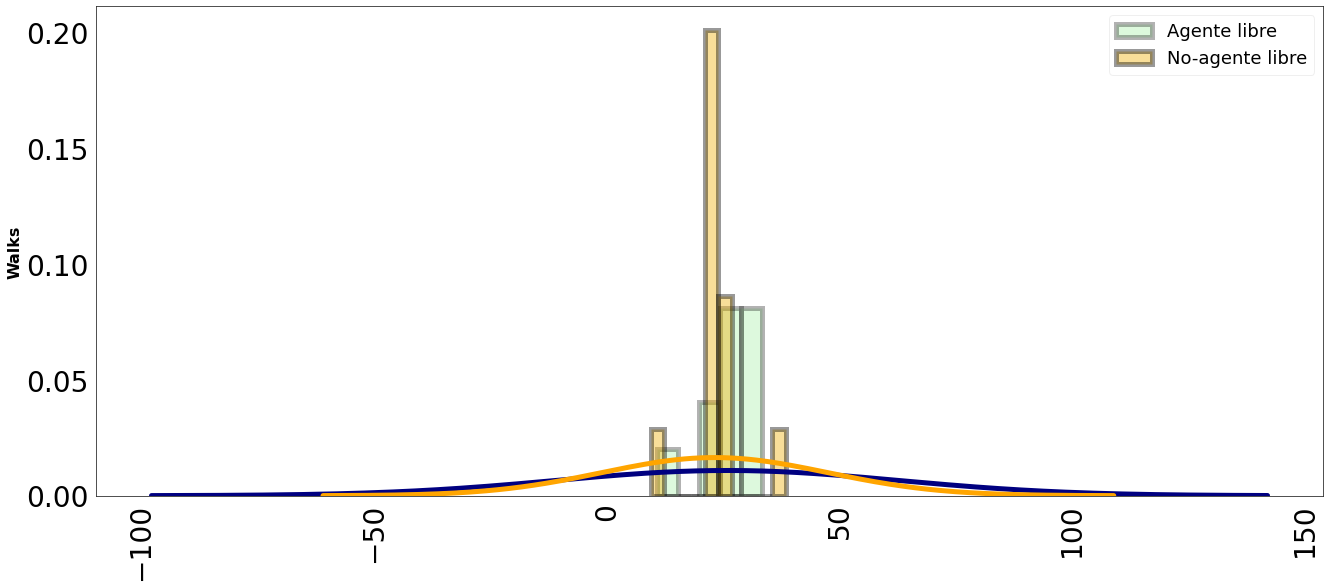

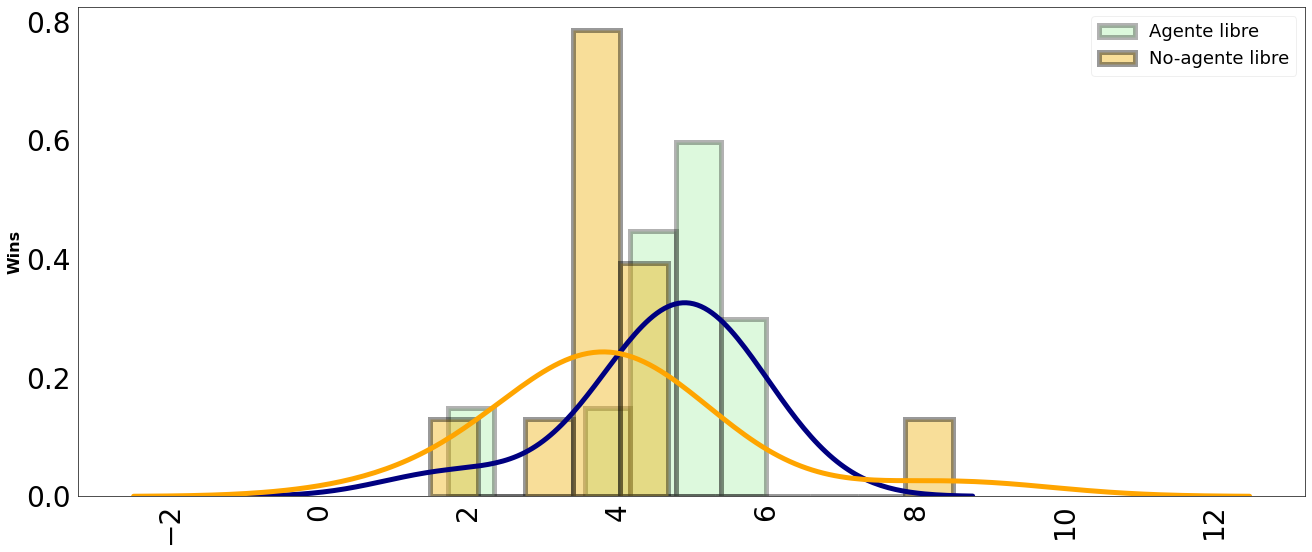

In [39]:
for i in range(0,len(pitcher_statistics)):
    print(pitcher_statistics[i])
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    g = sns.distplot(mean_panel_pitcher[mean_panel_pitcher['Agente_libre'] == 'Si'][pitcher_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': 'lightgreen',
                                 'edgecolor': 'black',
                                 'linewidth': 5,
                                 'linestyle': 'solid',
                                 'alpha': 0.3},
                     kde_kws = {"color": "navy",
                                "linewidth": 5,
                                "bw": fa_pitcher_binwidth[i]},
                     label = 'Agente libre')
    g = sns.distplot(mean_panel_pitcher[mean_panel_pitcher['Agente_libre'] == 'No'][pitcher_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (239/255,173/255,1/255,0.8),
                                 'edgecolor': 'black',
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "orange",
                                "linewidth": 5,
                                "bw": no_pitcher_binwidth[i]},
                     label = 'No-agente libre')
    g.set_xlabel('Temporadas',
                 fontsize = 16,
                 color = 'black',
                 fontweight = 'bold')
    g.set_ylabel(pitcher_labels[i], 
                 fontsize = 16,
                 color = 'black',
                 fontweight = 'bold')
    axes.tick_params(labelsize = 28,
                     labelcolor = 'black')
    g.tick_params(axis = 'x',
                  labelrotation = 90)
    legend = plt.legend(loc = 'best', 
                        labelcolor = 'black',
                        fontsize = 18,
                        facecolor = 'white',
                        framealpha = 0.3,
                        fancybox = True,
                        frameon = True)
    g.set(xlabel = None)
    #g.set(ylabel = None)
    g.patch.set_facecolor('white')